### Primary Modeling

**National Accounts**

- GDP
- Private consumption
- construction
- Facilities Investment
- Export of goods and services

**Labor**

- Unemployment rate
- Employment to population ratio
- Number of job opening per unemployment persons
- Employment rate
- Employed persons

**International Trade**
- Export
- Import
- Import price Index
- Export price Index

**Consumption Price**
- Retail Sales Index
- Consumer Price Index
- Producer Price Index
- Consumer Price Index (ex agricultural products & oils)
- Consumer Price Index (ex food & energy)

**Production, Manufacturing**
- Total Equipment Index
- Manufacturing Shipment Index
- Manufacturing Inventory Index
- Index of Services Production
- Index of Mining and Manufacturing Production

**Survey data**
- Sales Growth BSI (all industries)
- Business Condition BSI (all industries)
- Exports Growth BSI (manufacturing)
- Operation ratio BSI (manufacturing)
- New Orders Growth BSI (manufacturing)
- Domestic Sales Growth BSI (manufacturing)
- Economic Sentiment Index
- Current Economic Situation CSI
- Composite Consumer Sentiment Index

In [1]:
import pandas as pd
import numpy as np

consumption = pd.read_csv('../Cleaned_Data/consumption2.csv', index_col = 0)
consumption.index = pd.to_datetime(consumption.index).strftime('%Y-%m')
consumption.index = pd.to_datetime(consumption.index)

production = pd.read_csv('../Cleaned_Data/production.csv', index_col = 0)
production.index = pd.to_datetime(production.index).strftime('%Y-%m')
production.index = pd.to_datetime(production.index)

facility = pd.read_csv('../Cleaned_Data/facility.csv', index_col = 0)
facility.index = pd.to_datetime(facility.index).strftime('%Y-%m')
facility.index = pd.to_datetime(facility.index)

construction = pd.read_csv('../Cleaned_Data/construction.csv', index_col = 0)
construction.index = pd.to_datetime(construction.index).strftime('%Y-%m')
construction.index = pd.to_datetime(construction.index)

sentiment = pd.read_csv('../Cleaned_Data/sentiment_index.csv', index_col = 0)
sentiment.index = pd.to_datetime(sentiment.index).strftime('%Y-%m')
sentiment.index = pd.to_datetime(sentiment.index)

labor = pd.read_csv('../Cleaned_Data/Labor.csv', index_col = 0)
labor.index = pd.to_datetime(labor.index).strftime('%Y-%m')
labor.index = pd.to_datetime(labor.index)

cb = pd.read_csv('../Cleaned_Data/Current_balance.csv', index_col = 0)
cb.index = pd.to_datetime(cb.index).strftime('%Y-%m')
cb.index = pd.to_datetime(cb.index)

money = pd.read_csv('../Cleaned_Data/monetary_market.csv', index_col = 0)
money.index = pd.to_datetime(money.index)

credit = pd.read_csv('../Cleaned_Data/credit.csv', index_col = 0)
credit.index = pd.to_datetime(credit.index)

In [2]:
feature_matrix = {
    'consumption' : consumption,
    'production' : production,
    'facility_investment' : facility,
    'construction_investment' : construction,
    'sentiment_index' : sentiment,
    'labor' : labor,
    'current_balance' : cb,
    'monetary_market' : money,
    'credit_risk' : credit
}

target

In [3]:
gdp = pd.read_excel('../Cleaned_Data/gdp_target2.xlsx', index_col = 0) * 0.01

In [4]:
gdp.index = pd.date_range(start = '2001-01-01', end = '2023-10-01', freq = 'M').strftime('%Y-%m')

In [5]:
gdp.index = pd.to_datetime(gdp.index)

In [6]:
gdp

gdp_estimated
2001-01-01       0.000000
2001-02-01      -0.157105
2001-03-01       0.033472
2001-04-01       0.037972
2001-05-01       0.034091
...                   ...
2023-05-01       0.001380
2023-06-01       0.004700
2023-07-01      -0.003103
2023-08-01       0.012109
2023-09-01       0.016312

[273 rows x 1 columns]

#### Primary Modeling

In [7]:
train_matrix = pd.DataFrame(index = feature_matrix['consumption'].loc[:'2022-10'].index)
test_matrix = pd.DataFrame(index = feature_matrix['consumption'].loc['2022-11':].index)

consumption

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

X = feature_matrix['consumption'].drop([
    'gdp_lag1',
    'estimated_consumption',
    'moneraty_rate',
    'ccpi_without_arg_crd_oil',
    'ccpi_without_food_energy',
    'mortgage_loan',
    'vehicle_consumption',
    'cpi_rate'
], axis = 1)
y = feature_matrix['consumption']['estimated_consumption']

X_train, X_test, y_train, y_test = X.loc[:'2021-10'], X.loc['2021-11':], y.loc[:'2021-10'], y.loc['2021-11':]

consumption_model = RandomForestRegressor(n_estimators = 1000, 
                                          random_state = 42,
                                          criterion = 'squared_error',
                                          max_depth = 6)
consumption_model.fit(X_train, y_train)
y_pred = consumption_model.predict(X_test)
pred_train = consumption_model.predict(X_train)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")

Mean Squared Error: 7.378584056151843e-05


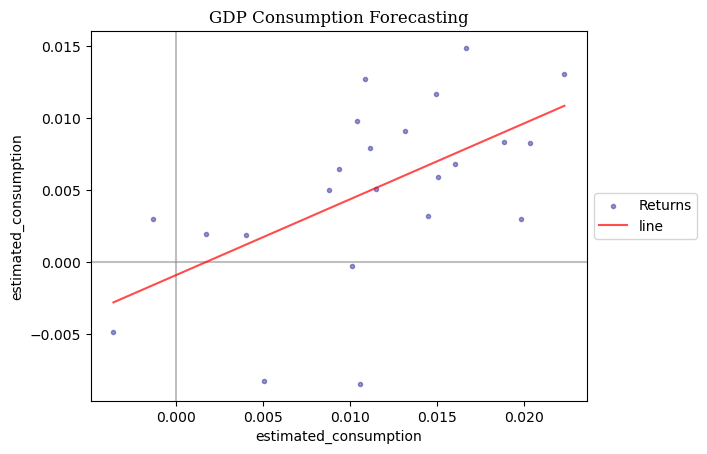

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
beta, alpha = np.polyfit(x = y_test , y = y_pred ,deg = 1)
plt.axvline(0, color = 'grey', alpha = 0.5)
plt.axhline(0, color = 'grey', alpha = 0.5)
plt.scatter(y = y_pred, x = y_test, label = 'Returns', marker = '.', color = 'navy', alpha = 0.4)
sns.lineplot(x = y_test, y = alpha + y_test * beta, color = 'red', label = 'line', alpha = 0.7)
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.title('GDP Consumption Forecasting', fontfamily = 'Serif')
plt.grid(False)
plt.show()

In [10]:
import plotly.offline as pyo
pyo.init_notebook_mode()

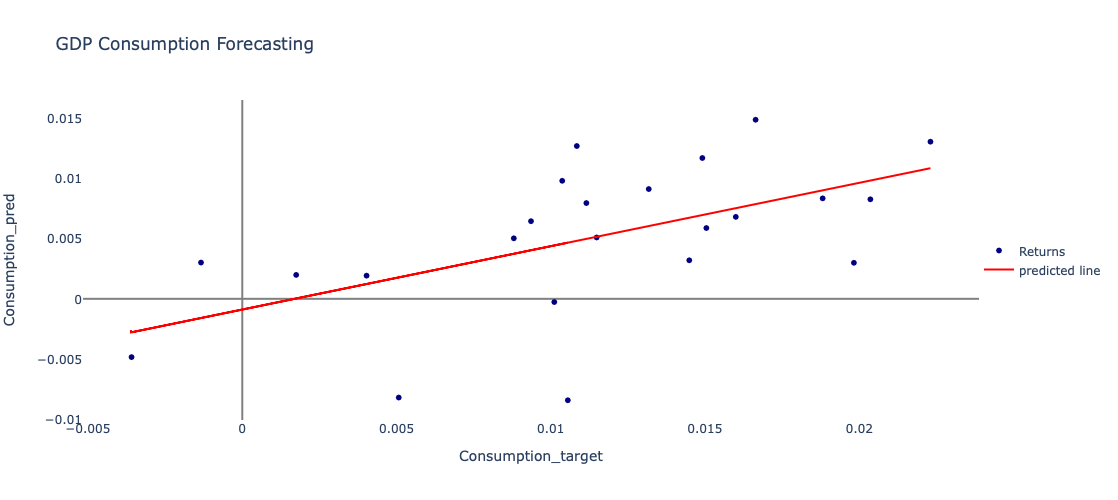

In [11]:
import plotly.graph_objects as go
beta, alpha = np.polyfit(x = y_test, y = y_pred, deg = 1)
scatter = go.Scatter(x=y_test, y=y_pred, mode='markers', name='Returns',
                     marker=dict(color='navy'))
line = go.Scatter(x=y_test, y=alpha + beta * y_test, mode='lines', name='predicted line',
                  line=dict(color='red'))
fig = go.Figure(data=[scatter, line])
fig.update_layout(title='GDP Consumption Forecasting',
                  xaxis=dict(title='Consumption_target', zerolinecolor='grey', zerolinewidth=2),
                  yaxis=dict(title='Consumption_pred', zerolinecolor='grey', zerolinewidth=2),
                  legend=dict(x=1, y=0.5),
                  paper_bgcolor='white', plot_bgcolor='white')
fig.update_layout(width = 700, height = 500)
fig.show()

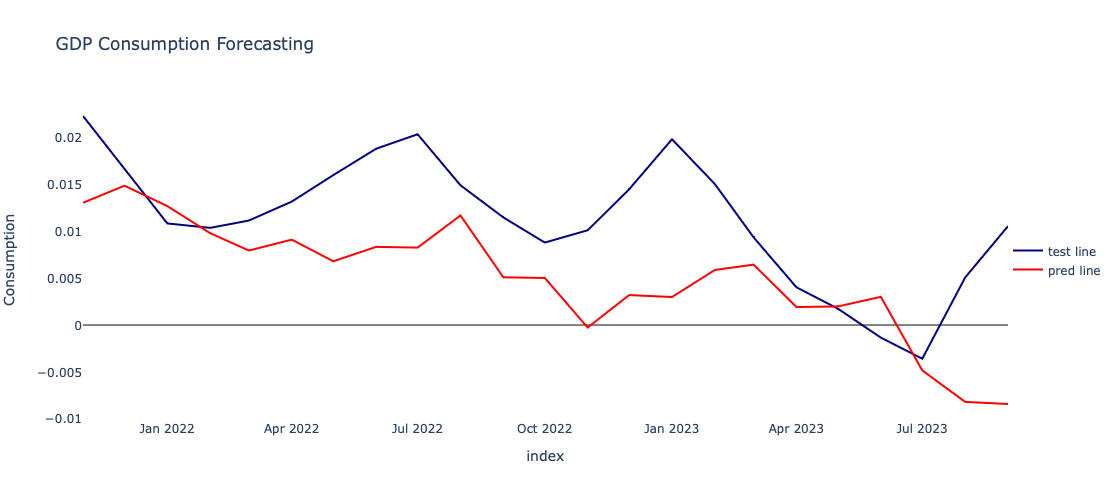

In [12]:
test_line = go.Scatter(x=y_test.index, 
                       y=y_test, 
                       mode='lines', 
                       name='test line', 
                       line=dict(color='navy'))
pred_line = go.Scatter(x=pd.Series(y_pred, index = y_test.index).index, 
                       y=pd.Series(y_pred, index = y_test.index), 
                       mode='lines', 
                       name='pred line', 
                       line=dict(color='red'))
fig = go.Figure(data=[test_line, pred_line])
fig.update_layout(title='GDP Consumption Forecasting',
                  xaxis=dict(title='index', zerolinecolor='grey', zerolinewidth=2),
                  yaxis=dict(title='Consumption', zerolinecolor='grey', zerolinewidth=2),
                  legend=dict(x=1, y=0.5),
                  paper_bgcolor='white', plot_bgcolor='white')
fig.update_layout(width = 900, height = 500)
fig.show()

In [13]:
import shap

consumption_explain = shap.TreeExplainer(consumption_model)

shap_values_train = consumption_explain(X_train)
shap_values_test = consumption_explain(X_test)

/Users/junghunlee/anaconda3/envs/TimeSeriesModeling/lib/python3.10/site-packages/shap/utils/_clustering.py:35: NumbaDeprecationWarning:

The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.

/Users/junghunlee/anaconda3/envs/TimeSeriesModeling/lib/python3.10/site-packages/shap/utils/_clustering.py:54: NumbaDeprecationWarning:

The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.

/Users/junghunlee/anaconda3/envs/TimeSeriesModelin

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


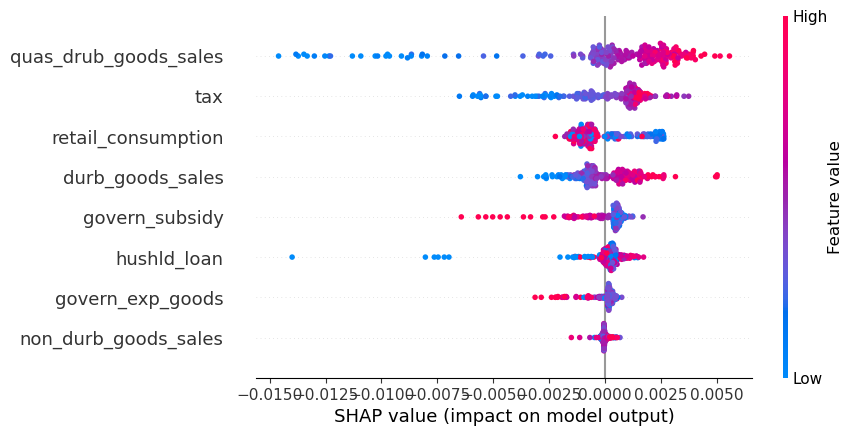

In [14]:
plt.grid(False)
shap.plots.beeswarm(shap_values_train, max_display = len(shap_values_train.feature_names))

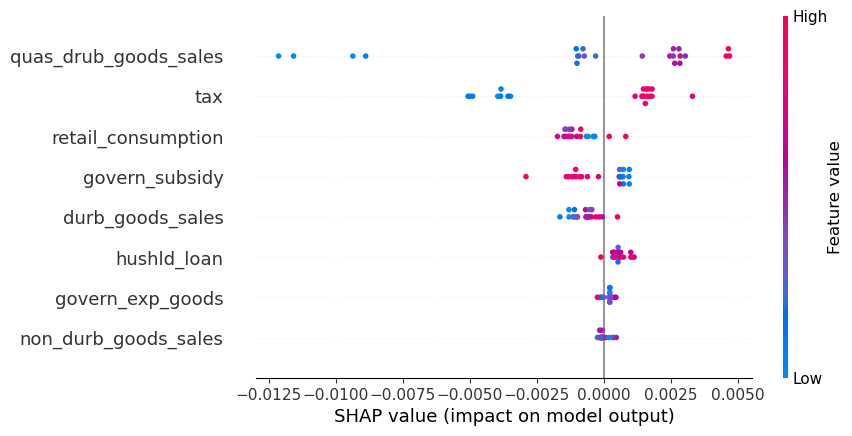

In [15]:
plt.grid(False)
shap.plots.beeswarm(shap_values_test, max_display = len(shap_values_train.feature_names))

In [16]:
train_matrix = pd.concat([
    train_matrix,
    pd.Series(pred_train, index = X_train.index, name = 'consumption')
], axis = 1
)
test_matrix = pd.concat([
    test_matrix, 
    pd.Series(y_pred, index = X_test.index, name = 'consumption')
], axis = 1)

construction

In [17]:
X = feature_matrix['construction_investment'].iloc[:,:-1]
y = feature_matrix['construction_investment']['estimated_construction']

X_train, X_test, y_train, y_test = X.loc[:'2021-10'], X.loc['2021-11':], y.loc[:'2021-10'], y.loc['2021-11':]

construction_model = RandomForestRegressor(n_estimators = 1000, 
                                          random_state = 42,
                                          criterion = 'squared_error',
                                          max_depth = 6)
construction_model.fit(X_train, y_train)
y_pred = construction_model.predict(X_test)
pred_train = construction_model.predict(X_train)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.0002944405760893241


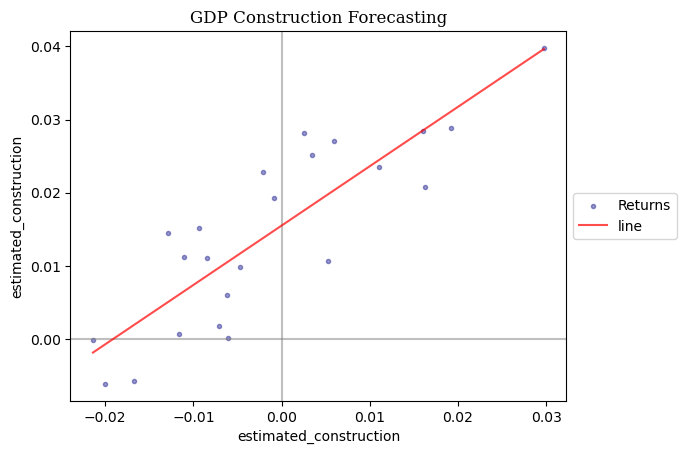

In [18]:
beta, alpha = np.polyfit(x = y_test , y = y_pred ,deg = 1)
plt.axvline(0, color = 'grey', alpha = 0.5)
plt.axhline(0, color = 'grey', alpha = 0.5)
plt.scatter(y = y_pred, x = y_test, label = 'Returns', marker = '.', color = 'navy', alpha = 0.4)
sns.lineplot(x = y_test, y = alpha + y_test * beta, color = 'red', label = 'line', alpha = 0.7)
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.title('GDP Construction Forecasting', fontfamily = 'Serif')
plt.grid(False)
plt.show()

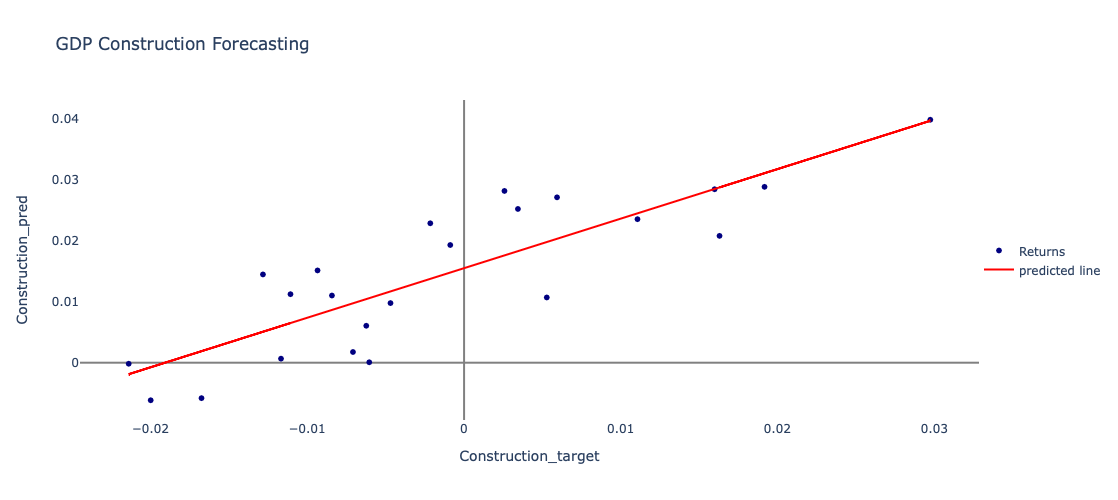

In [19]:
beta, alpha = np.polyfit(x = y_test, y = y_pred, deg = 1)
scatter = go.Scatter(x=y_test, y=y_pred, mode='markers', name='Returns',
                     marker=dict(color='navy'))
line = go.Scatter(x=y_test, y=alpha + beta * y_test, mode='lines', name='predicted line',
                  line=dict(color='red'))
fig = go.Figure(data=[scatter, line])
fig.update_layout(title='GDP Construction Forecasting',
                  xaxis=dict(title='Construction_target', zerolinecolor='grey', zerolinewidth=2),
                  yaxis=dict(title='Construction_pred', zerolinecolor='grey', zerolinewidth=2),
                  legend=dict(x=1, y=0.5),
                  paper_bgcolor='white', plot_bgcolor='white')
fig.update_layout(width = 700, height = 500)
fig.show()

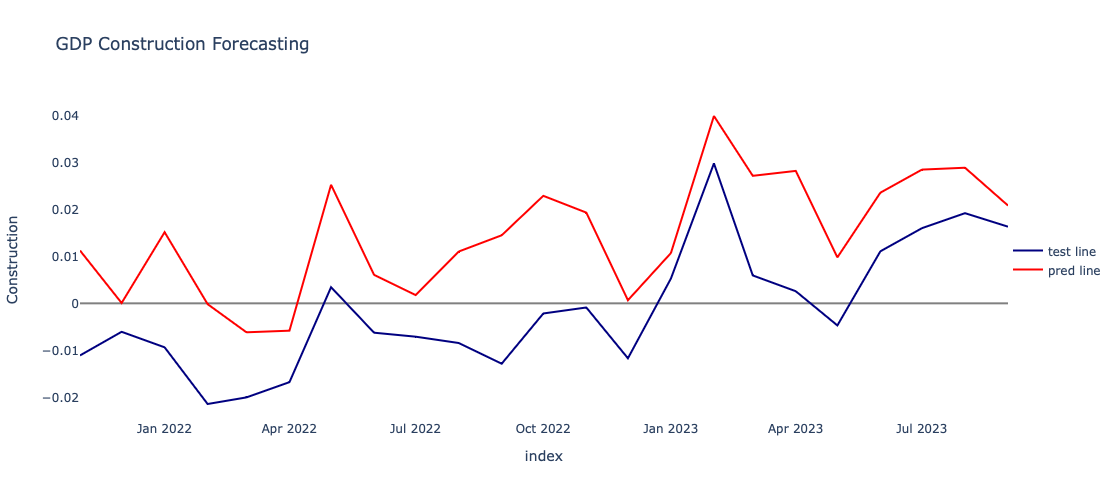

In [20]:
test_line = go.Scatter(x=y_test.index, 
                       y=y_test, 
                       mode='lines', 
                       name='test line', 
                       line=dict(color='navy'))
pred_line = go.Scatter(x=pd.Series(y_pred, index = y_test.index).index, 
                       y=pd.Series(y_pred, index = y_test.index), 
                       mode='lines', 
                       name='pred line', 
                       line=dict(color='red'))
fig = go.Figure(data=[test_line, pred_line])
fig.update_layout(title='GDP Construction Forecasting',
                  xaxis=dict(title='index', zerolinecolor='grey', zerolinewidth=2),
                  yaxis=dict(title='Construction', zerolinecolor='grey', zerolinewidth=2),
                  legend=dict(x=1, y=0.5),
                  paper_bgcolor='white', plot_bgcolor='white')
fig.update_layout(width = 900, height = 500)
fig.show()

In [21]:
construction_explain = shap.TreeExplainer(construction_model)

shap_values_train = construction_explain(X_train)
shap_values_test = construction_explain(X_test)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


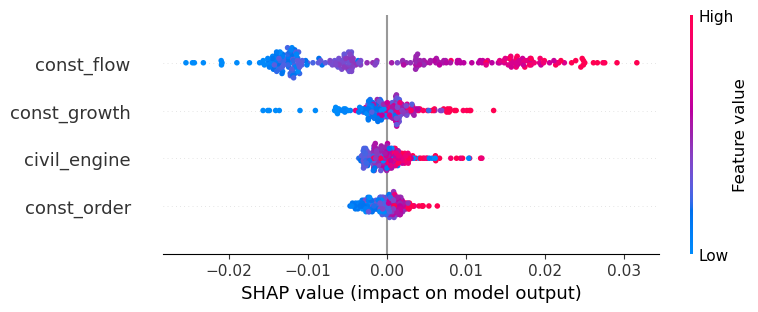

In [22]:
plt.grid(False)
shap.plots.beeswarm(shap_values_train, max_display = len(shap_values_train.feature_names))

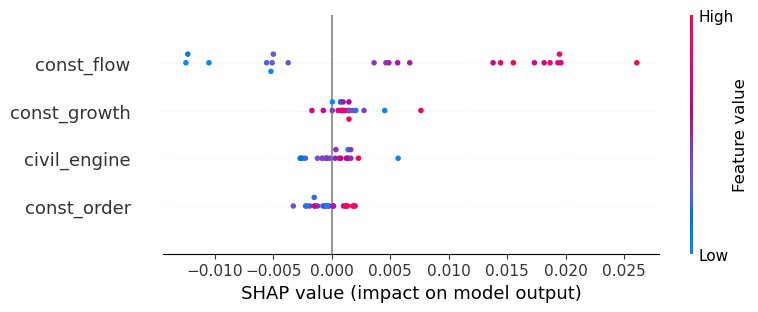

In [23]:
plt.grid(False)
shap.plots.beeswarm(shap_values_test, max_display = len(shap_values_train.feature_names))

In [24]:
train_matrix = pd.concat([
    train_matrix,
    pd.Series(pred_train, index = X_train.index, name = 'construction')
], axis = 1
)
test_matrix = pd.concat([
    test_matrix, 
    pd.Series(y_pred, index = X_test.index, name = 'construction')
], axis = 1)

facility

In [25]:
X = feature_matrix['facility_investment'].iloc[:,:-1]
y = feature_matrix['facility_investment']['estimated_facility']

X_train, X_test, y_train, y_test = X.loc[:'2021-10'], X.loc['2021-11':], y.loc[:'2021-10'], y.loc['2021-11':]

facil_model = RandomForestRegressor(n_estimators = 1000, 
                                          random_state = 42,
                                          criterion = 'squared_error',
                                          max_depth = 6)
facil_model.fit(X_train, y_train)
y_pred = facil_model.predict(X_test)
pred_train = facil_model.predict(X_train)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.00038422844917311414


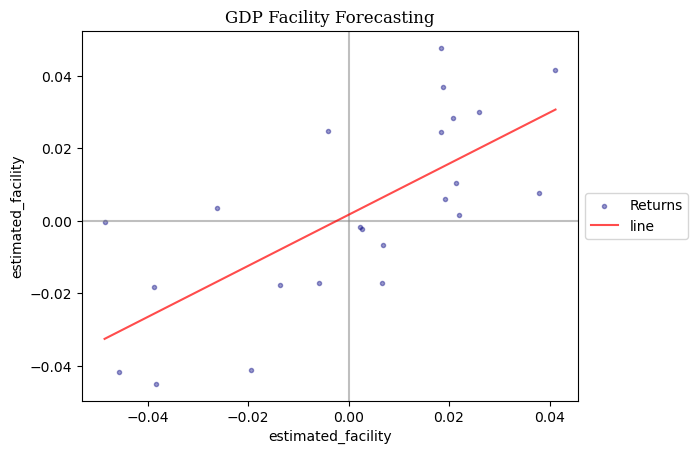

In [26]:
beta, alpha = np.polyfit(x = y_test , y = y_pred ,deg = 1)
plt.axvline(0, color = 'grey', alpha = 0.5)
plt.axhline(0, color = 'grey', alpha = 0.5)
plt.scatter(y = y_pred, x = y_test, label = 'Returns', marker = '.', color = 'navy', alpha = 0.4)
sns.lineplot(x = y_test, y = alpha + y_test * beta, color = 'red', label = 'line', alpha = 0.7)
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.title('GDP Facility Forecasting', fontfamily = 'Serif')
plt.grid(False)
plt.show()

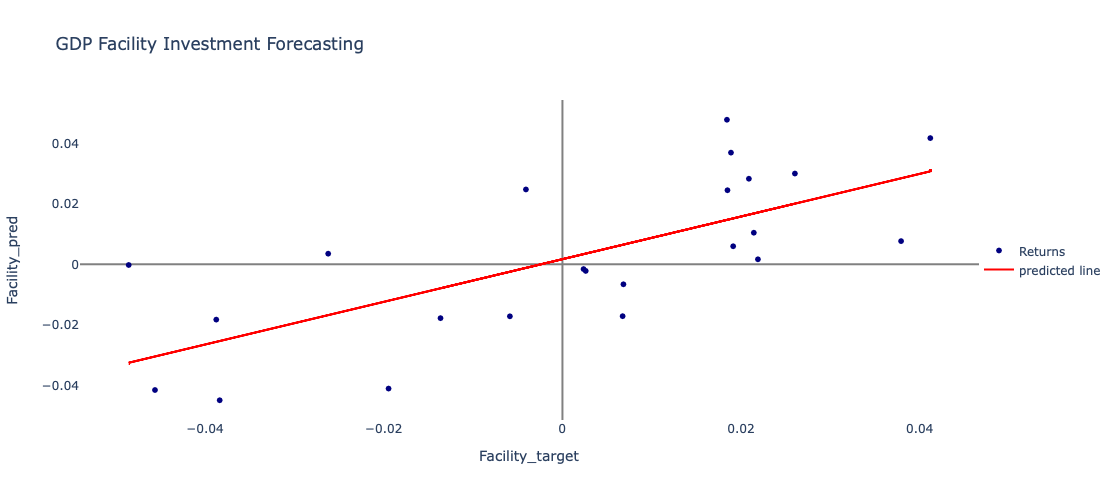

In [27]:
beta, alpha = np.polyfit(x = y_test, y = y_pred, deg = 1)
scatter = go.Scatter(x=y_test, y=y_pred, mode='markers', name='Returns',
                     marker=dict(color='navy'))
line = go.Scatter(x=y_test, y=alpha + beta * y_test, mode='lines', name='predicted line',
                  line=dict(color='red'))
fig = go.Figure(data=[scatter, line])
fig.update_layout(title='GDP Facility Investment Forecasting',
                  xaxis=dict(title='Facility_target', zerolinecolor='grey', zerolinewidth=2),
                  yaxis=dict(title='Facility_pred', zerolinecolor='grey', zerolinewidth=2),
                  legend=dict(x=1, y=0.5),
                  paper_bgcolor='white', plot_bgcolor='white')
fig.update_layout(width = 700, height = 500)
fig.show()

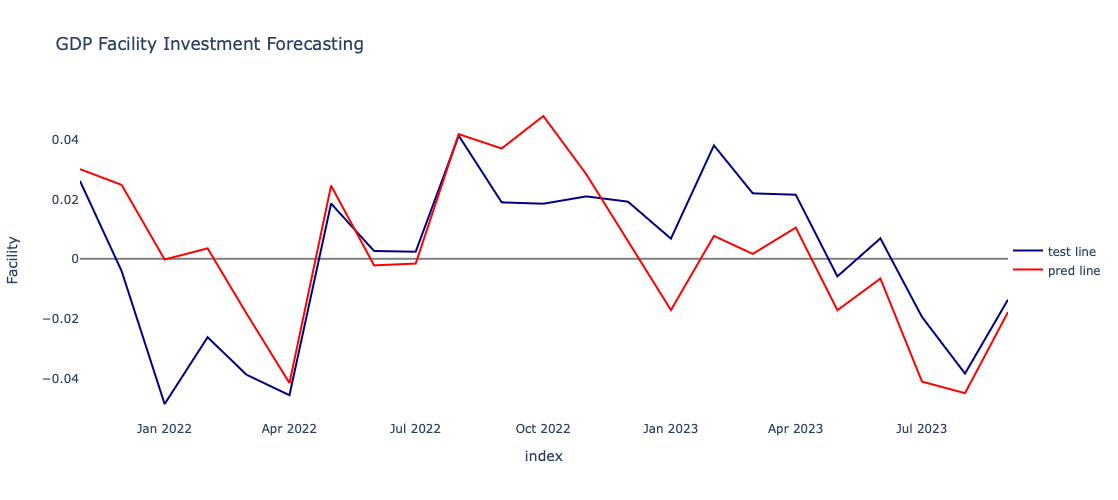

In [28]:
test_line = go.Scatter(x=y_test.index, 
                       y=y_test, 
                       mode='lines', 
                       name='test line', 
                       line=dict(color='navy'))
pred_line = go.Scatter(x=pd.Series(y_pred, index = y_test.index).index, 
                       y=pd.Series(y_pred, index = y_test.index), 
                       mode='lines', 
                       name='pred line', 
                       line=dict(color='red'))
fig = go.Figure(data=[test_line, pred_line])
fig.update_layout(title='GDP Facility Investment Forecasting',
                  xaxis=dict(title='index', zerolinecolor='grey', zerolinewidth=2),
                  yaxis=dict(title='Facility', zerolinecolor='grey', zerolinewidth=2),
                  legend=dict(x=1, y=0.5),
                  paper_bgcolor='white', plot_bgcolor='white')
fig.update_layout(width = 900, height = 500)
fig.show()

In [29]:
facil_explain = shap.TreeExplainer(facil_model)

shap_values_train = facil_explain(X_train)
shap_values_test = facil_explain(X_test)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


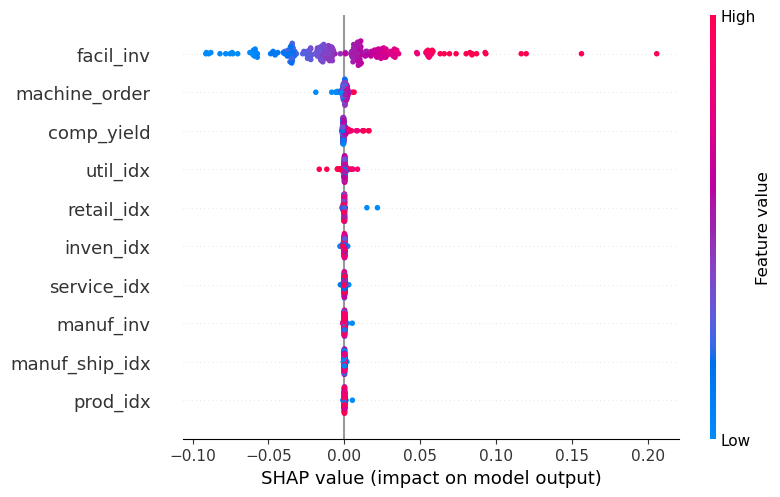

In [30]:
plt.grid(False)
shap.plots.beeswarm(shap_values_train, max_display = len(shap_values_train.feature_names))

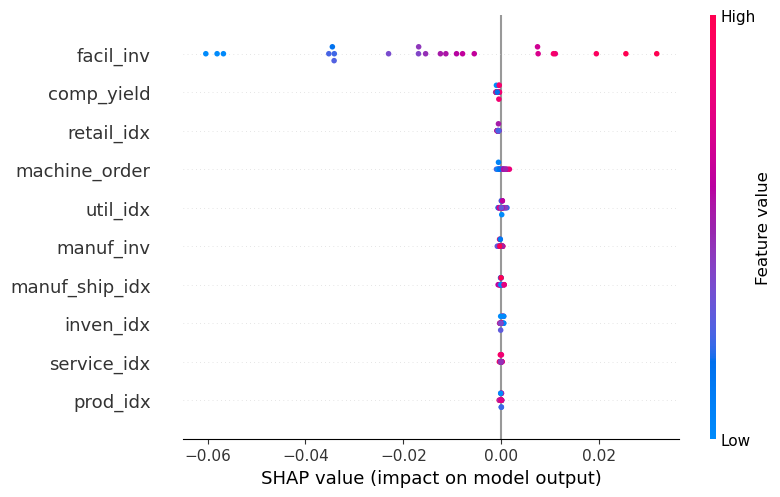

In [31]:
plt.grid(False)
shap.plots.beeswarm(shap_values_test, max_display = len(shap_values_train.feature_names))

In [32]:
train_matrix = pd.concat([
    train_matrix,
    pd.Series(pred_train, index = X_train.index, name = 'facility')
], axis = 1
)
test_matrix = pd.concat([
    test_matrix, 
    pd.Series(y_pred, index = X_test.index, name = 'facility')
], axis = 1)

production

In [33]:
X = feature_matrix['production'].iloc[:,1:]
y = feature_matrix['production']['production_idx']

X_train, X_test, y_train, y_test = X.loc[:'2021-10'], X.loc['2021-11':], y.loc[:'2021-10'], y.loc['2021-11':]

prod_model = RandomForestRegressor(n_estimators = 1000, 
                                          random_state = 42,
                                          criterion = 'squared_error',
                                          max_depth = 6)
prod_model.fit(X_train, y_train)
y_pred = prod_model.predict(X_test)
pred_train = prod_model.predict(X_train)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.0001577443008201517


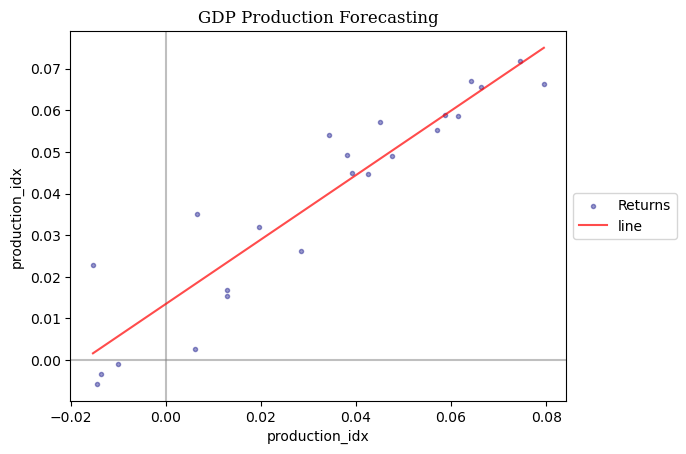

In [34]:
beta, alpha = np.polyfit(x = y_test , y = y_pred ,deg = 1)
plt.axvline(0, color = 'grey', alpha = 0.5)
plt.axhline(0, color = 'grey', alpha = 0.5)
plt.scatter(y = y_pred, x = y_test, label = 'Returns', marker = '.', color = 'navy', alpha = 0.4)
sns.lineplot(x = y_test, y = alpha + y_test * beta, color = 'red', label = 'line', alpha = 0.7)
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.title('GDP Production Forecasting', fontfamily = 'Serif')
plt.grid(False)
plt.show()

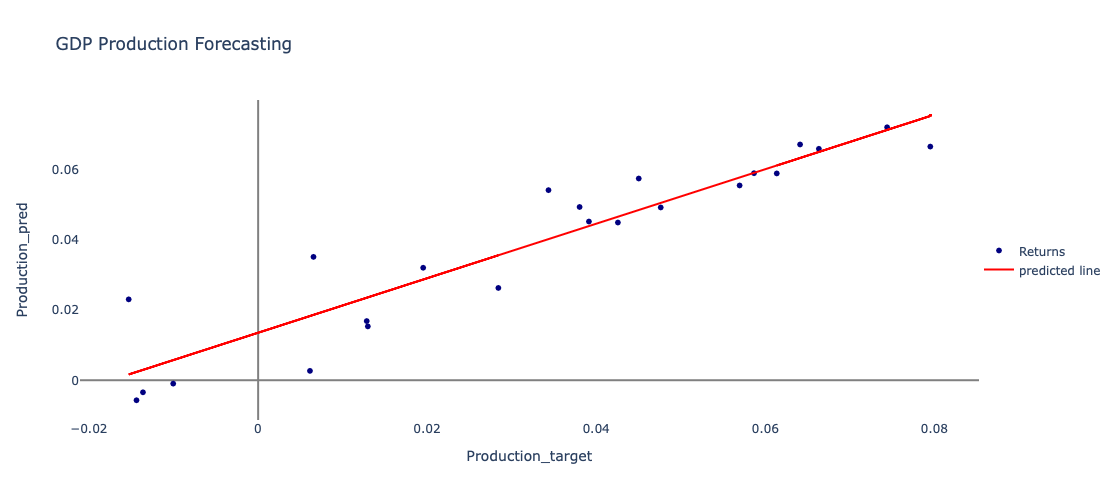

In [35]:
beta, alpha = np.polyfit(x = y_test, y = y_pred, deg = 1)
scatter = go.Scatter(x=y_test, y=y_pred, mode='markers', name='Returns',
                     marker=dict(color='navy'))
line = go.Scatter(x=y_test, y=alpha + beta * y_test, mode='lines', name='predicted line',
                  line=dict(color='red'))
fig = go.Figure(data=[scatter, line])
fig.update_layout(title='GDP Production Forecasting',
                  xaxis=dict(title='Production_target', zerolinecolor='grey', zerolinewidth=2),
                  yaxis=dict(title='Production_pred', zerolinecolor='grey', zerolinewidth=2),
                  legend=dict(x=1, y=0.5),
                  paper_bgcolor='white', plot_bgcolor='white')
fig.update_layout(width = 700, height = 500)
fig.show()

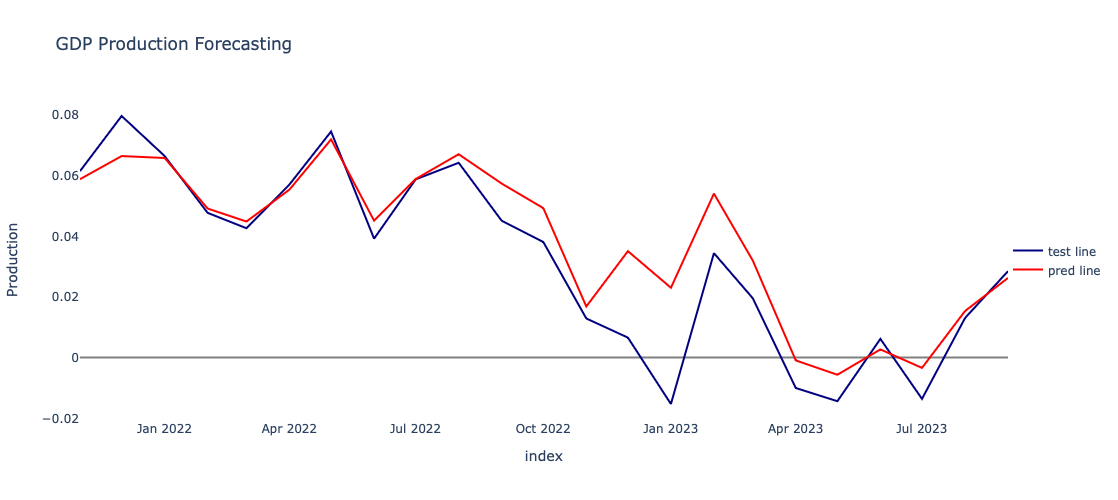

In [36]:
test_line = go.Scatter(x=y_test.index, 
                       y=y_test, 
                       mode='lines', 
                       name='test line', 
                       line=dict(color='navy'))
pred_line = go.Scatter(x=pd.Series(y_pred, index = y_test.index).index, 
                       y=pd.Series(y_pred, index = y_test.index), 
                       mode='lines', 
                       name='pred line', 
                       line=dict(color='red'))
fig = go.Figure(data=[test_line, pred_line])
fig.update_layout(title='GDP Production Forecasting',
                  xaxis=dict(title='index', zerolinecolor='grey', zerolinewidth=2),
                  yaxis=dict(title='Production', zerolinecolor='grey', zerolinewidth=2),
                  legend=dict(x=1, y=0.5),
                  paper_bgcolor='white', plot_bgcolor='white')
fig.update_layout(width = 900, height = 500)
fig.show()

In [37]:
prod_explain = shap.TreeExplainer(prod_model)

shap_values_train = prod_explain(X_train)
shap_values_test = prod_explain(X_test)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


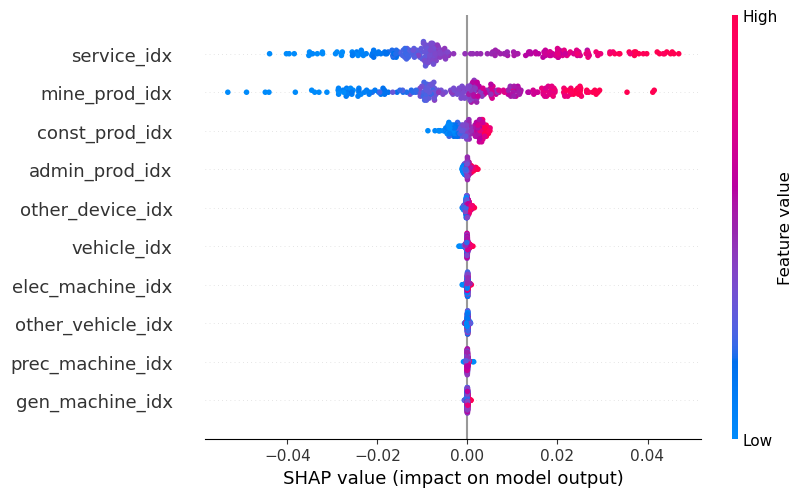

In [38]:
plt.grid(False)
shap.plots.beeswarm(shap_values_train, max_display = len(shap_values_train.feature_names))

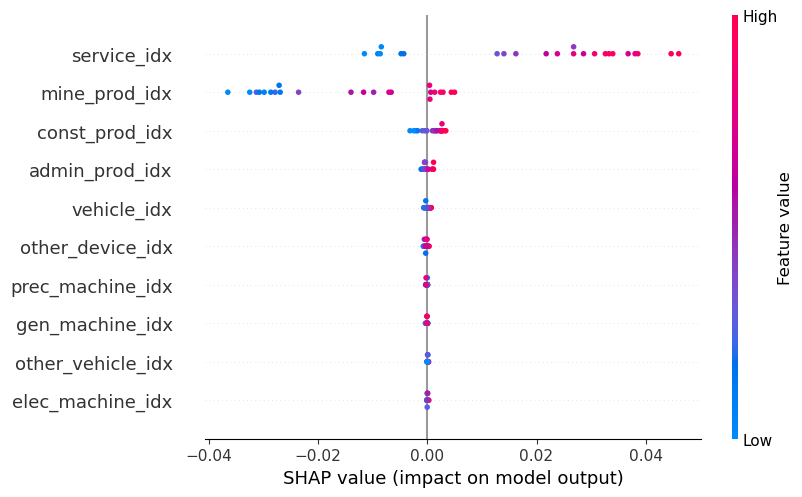

In [39]:
plt.grid(False)
shap.plots.beeswarm(shap_values_test, max_display = len(shap_values_train.feature_names))

In [40]:
train_matrix = pd.concat([
    train_matrix,
    pd.Series(pred_train, index = X_train.index, name = 'production')
], axis = 1, join = 'inner'
)
test_matrix = pd.concat([
    test_matrix, 
    pd.Series(y_pred, index = X_test.index, name = 'production')
], axis = 1, join = 'inner')

labor

In [41]:
X = feature_matrix['labor'].iloc[:,1:]
y = feature_matrix['labor']['unemployment_rate']

X_train, X_test, y_train, y_test = X.loc[:'2021-10'], X.loc['2021-11':], y.loc[:'2021-10'], y.loc['2021-11':]

labor_model = RandomForestRegressor(n_estimators = 1000, 
                                          random_state = 42,
                                          criterion = 'squared_error',
                                          max_depth = 6)
labor_model.fit(X_train, y_train)
y_pred = labor_model.predict(X_test)
pred_train = labor_model.predict(X_train)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")

Mean Squared Error: 5.680392999999733e-06


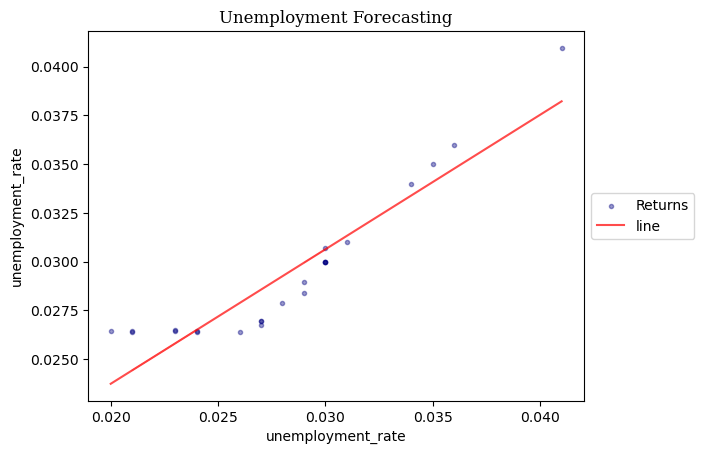

In [42]:
beta, alpha = np.polyfit(x = y_test , y = y_pred ,deg = 1)
plt.scatter(y = y_pred, x = y_test, label = 'Returns', marker = '.', color = 'navy', alpha = 0.4)
sns.lineplot(x = y_test, y = alpha + y_test * beta, color = 'red', label = 'line', alpha = 0.7)
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.title('Unemployment Forecasting', fontfamily = 'Serif')
plt.grid(False)
plt.show()

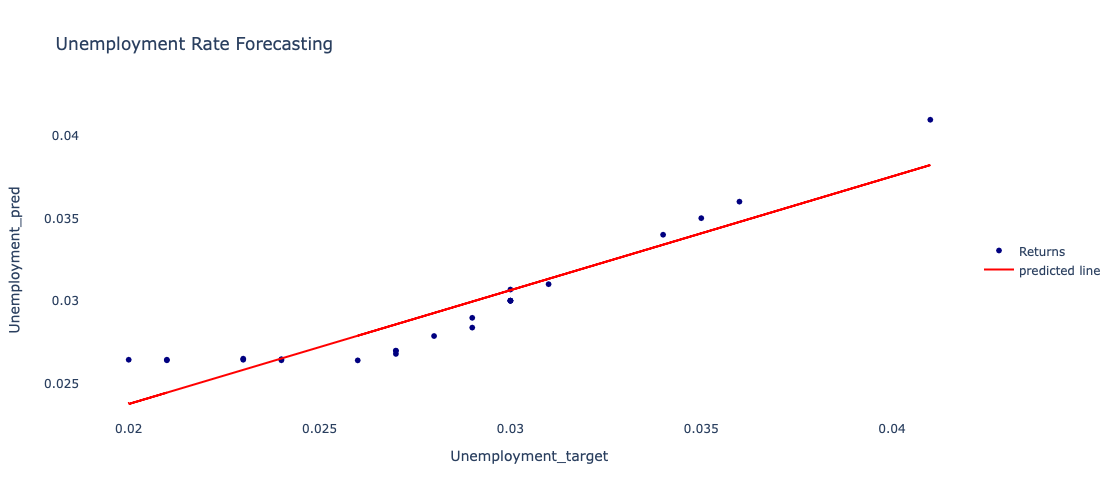

In [43]:
beta, alpha = np.polyfit(x = y_test, y = y_pred, deg = 1)
scatter = go.Scatter(x=y_test, y=y_pred, mode='markers', name='Returns',
                     marker=dict(color='navy'))
line = go.Scatter(x=y_test, y=alpha + beta * y_test, mode='lines', name='predicted line',
                  line=dict(color='red'))
fig = go.Figure(data=[scatter, line])
fig.update_layout(title='Unemployment Rate Forecasting',
                  xaxis=dict(title='Unemployment_target', zerolinecolor='grey', zerolinewidth=2),
                  yaxis=dict(title='Unemployment_pred', zerolinecolor='grey', zerolinewidth=2),
                  legend=dict(x=1, y=0.5),
                  paper_bgcolor='white', plot_bgcolor='white')
fig.update_layout(width = 700, height = 500)
fig.show()

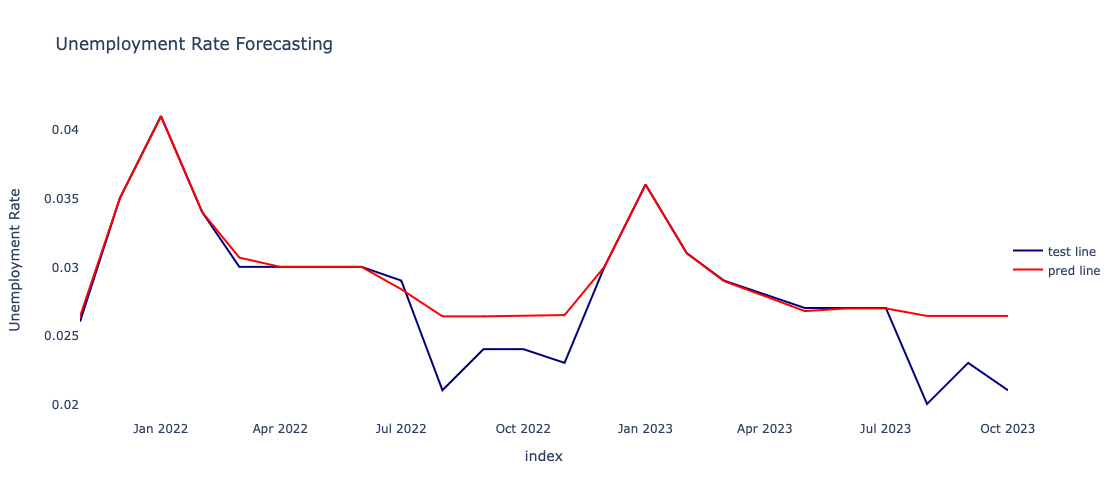

In [44]:
test_line = go.Scatter(x=y_test.index, 
                       y=y_test, 
                       mode='lines', 
                       name='test line', 
                       line=dict(color='navy'))
pred_line = go.Scatter(x=pd.Series(y_pred, index = y_test.index).index, 
                       y=pd.Series(y_pred, index = y_test.index), 
                       mode='lines', 
                       name='pred line', 
                       line=dict(color='red'))
fig = go.Figure(data=[test_line, pred_line])
fig.update_layout(title='Unemployment Rate Forecasting',
                  xaxis=dict(title='index', zerolinecolor='grey', zerolinewidth=2),
                  yaxis=dict(title='Unemployment Rate', zerolinecolor='grey', zerolinewidth=2),
                  legend=dict(x=1, y=0.5),
                  paper_bgcolor='white', plot_bgcolor='white')
fig.update_layout(width = 900, height = 500)
fig.show()

In [45]:
labor_explain = shap.TreeExplainer(labor_model)

shap_values_train = labor_explain(X_train)
shap_values_test = labor_explain(X_test)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


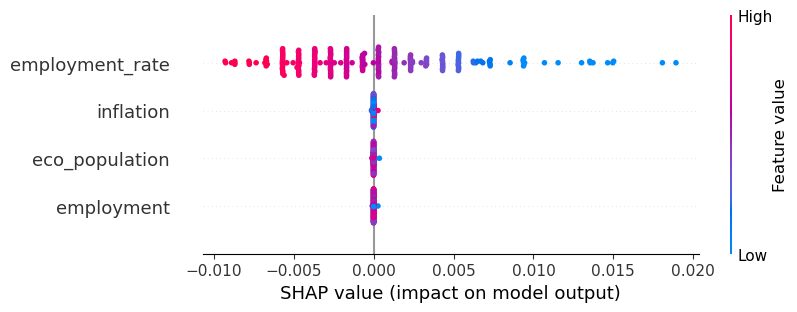

In [46]:
plt.grid(False)
shap.plots.beeswarm(shap_values_train, max_display = len(shap_values_train.feature_names))

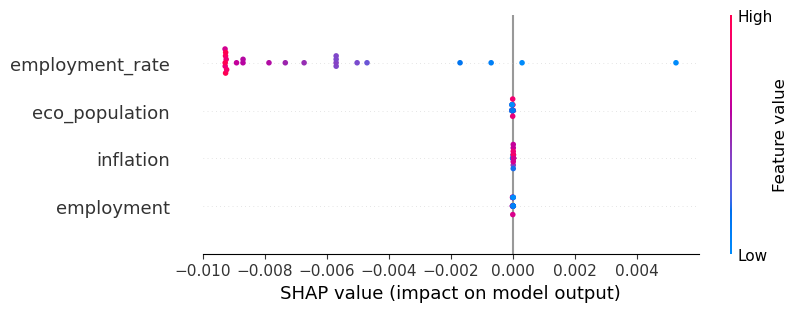

In [47]:
plt.grid(False)
shap.plots.beeswarm(shap_values_test, max_display = len(shap_values_train.feature_names))

In [48]:
train_matrix = pd.concat([
    train_matrix,
    pd.Series(pred_train, index = X_train.index, name = 'labor')
], axis = 1
)
test_matrix = pd.concat([
    test_matrix, 
    pd.Series(y_pred, index = X_test.index, name = 'labor')
], axis = 1)

Consumer Sentiment

In [49]:
X = feature_matrix['sentiment_index'].iloc[:,:7]
y = feature_matrix['sentiment_index']['econ_sent_idx_CSI']

X_train, X_test, y_train, y_test = X.loc[:'2021-10'], X.loc['2021-11':], y.loc[:'2021-10'], y.loc['2021-11':]

csi_model = RandomForestRegressor(n_estimators = 1000, 
                                          random_state = 42,
                                          criterion = 'squared_error',
                                          max_depth = 4)
csi_model.fit(X_train, y_train)
y_pred = csi_model.predict(X_test)
pred_train = csi_model.predict(X_train)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.0008673473438501417


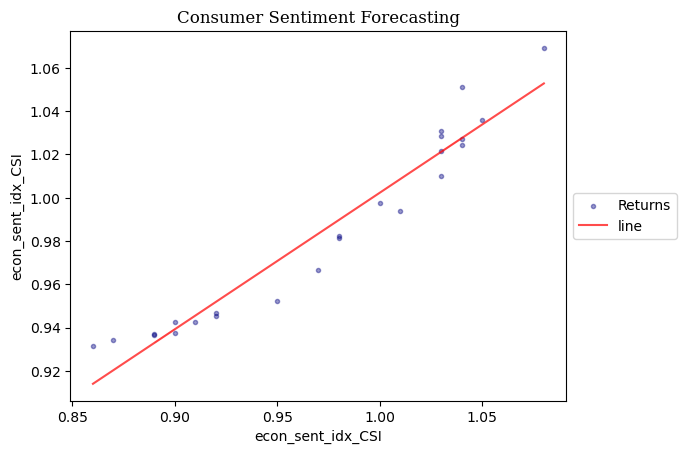

In [50]:
beta, alpha = np.polyfit(x = y_test , y = y_pred ,deg = 1)
plt.scatter(y = y_pred, x = y_test, label = 'Returns', marker = '.', color = 'navy', alpha = 0.4)
sns.lineplot(x = y_test, y = alpha + y_test * beta, color = 'red', label = 'line', alpha = 0.7)
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.title('Consumer Sentiment Forecasting', fontfamily = 'Serif')
plt.grid(False)
plt.show()

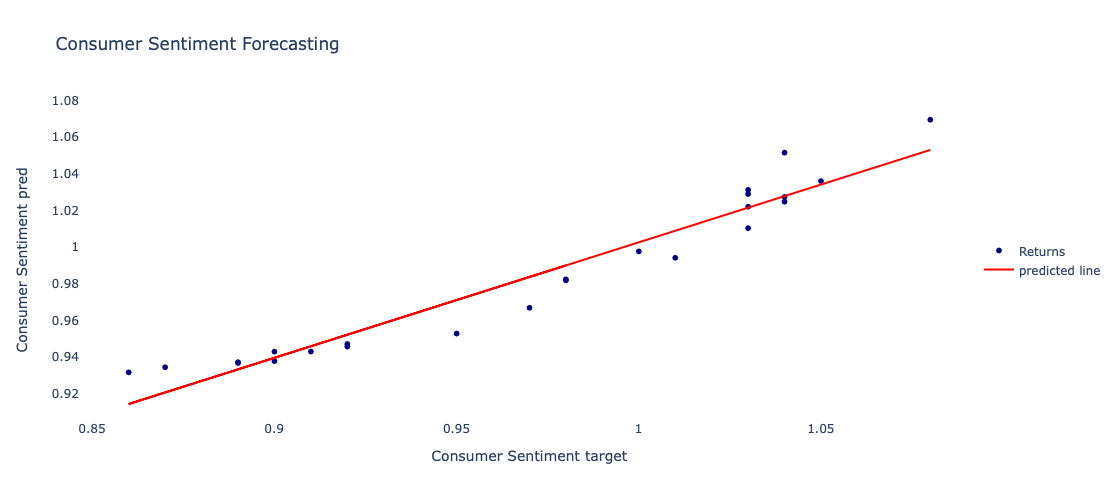

In [51]:
beta, alpha = np.polyfit(x = y_test, y = y_pred, deg = 1)
scatter = go.Scatter(x=y_test, y=y_pred, mode='markers', name='Returns',
                     marker=dict(color='navy'))
line = go.Scatter(x=y_test, y=alpha + beta * y_test, mode='lines', name='predicted line',
                  line=dict(color='red'))
fig = go.Figure(data=[scatter, line])
fig.update_layout(title='Consumer Sentiment Forecasting',
                  xaxis=dict(title='Consumer Sentiment target', zerolinecolor='grey', zerolinewidth=2),
                  yaxis=dict(title='Consumer Sentiment pred', zerolinecolor='grey', zerolinewidth=2),
                  legend=dict(x=1, y=0.5),
                  paper_bgcolor='white', plot_bgcolor='white')
fig.update_layout(width = 700, height = 500)
fig.show()

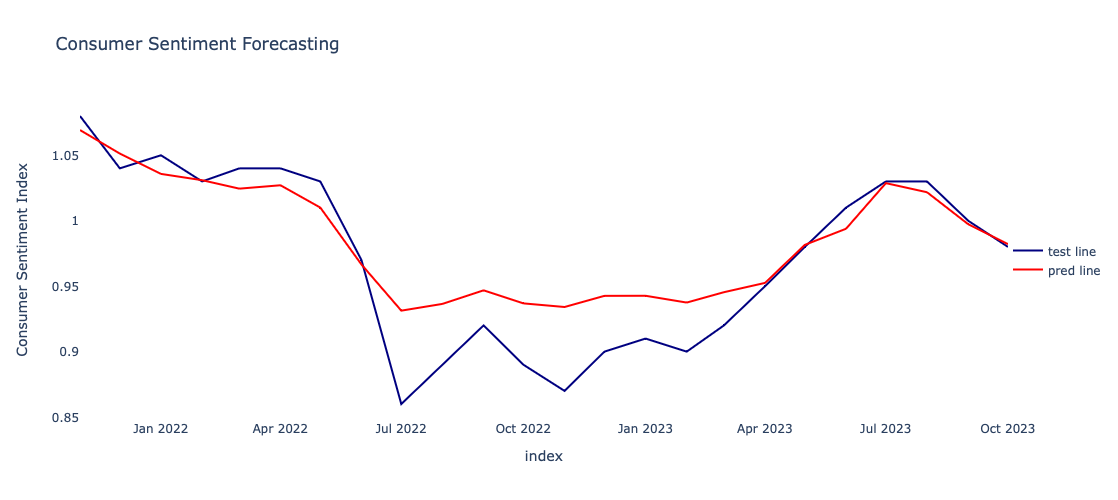

In [52]:
test_line = go.Scatter(x=y_test.index, 
                       y=y_test, 
                       mode='lines', 
                       name='test line', 
                       line=dict(color='navy'))
pred_line = go.Scatter(x=pd.Series(y_pred, index = y_test.index).index, 
                       y=pd.Series(y_pred, index = y_test.index), 
                       mode='lines', 
                       name='pred line', 
                       line=dict(color='red'))
fig = go.Figure(data=[test_line, pred_line])
fig.update_layout(title='Consumer Sentiment Forecasting',
                  xaxis=dict(title='index', zerolinecolor='grey', zerolinewidth=2),
                  yaxis=dict(title='Consumer Sentiment Index', zerolinecolor='grey', zerolinewidth=2),
                  legend=dict(x=1, y=0.5),
                  paper_bgcolor='white', plot_bgcolor='white')
fig.update_layout(width = 900, height = 500)
fig.show()

In [53]:
CSI_explain = shap.TreeExplainer(csi_model)

shap_values_train = CSI_explain(X_train)
shap_values_test = CSI_explain(X_test)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


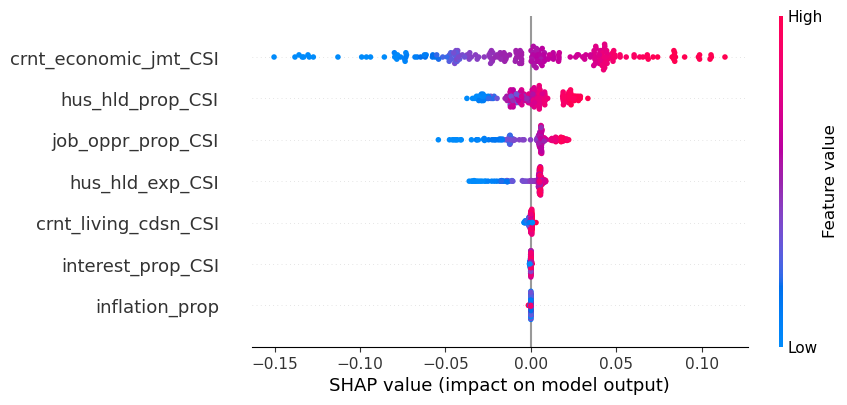

In [54]:
plt.grid(False)
shap.plots.beeswarm(shap_values_train, max_display = len(shap_values_train.feature_names))

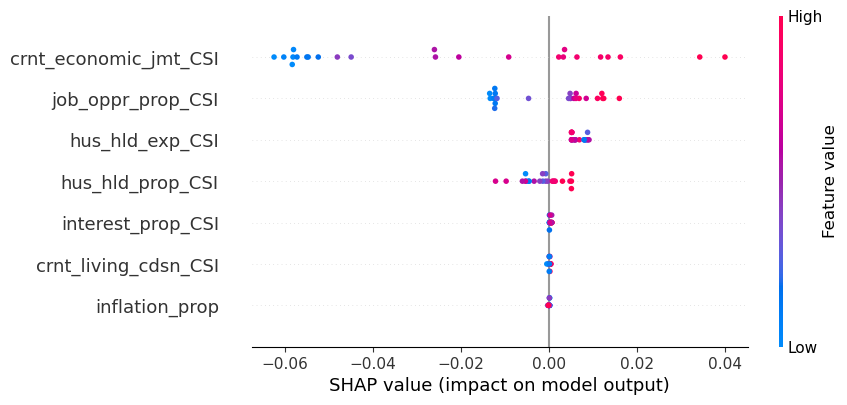

In [55]:
plt.grid(False)
shap.plots.beeswarm(shap_values_test, max_display = len(shap_values_train.feature_names))

In [56]:
train_matrix = pd.concat([
    train_matrix,
    pd.Series(pred_train, index = X_train.index, name = 'consumer_expectation')
], axis = 1
)
test_matrix = pd.concat([
    test_matrix, 
    pd.Series(y_pred, index = X_test.index, name = 'consumer_expectation')
], axis = 1)

bsi

In [57]:
X = feature_matrix['sentiment_index'].iloc[:,-7:-1]
y = feature_matrix['sentiment_index']['industry_BSI']

X_train, X_test, y_train, y_test = X.loc[:'2021-10'], X.loc['2021-11':], y.loc[:'2021-10'], y.loc['2021-11':]

bsi_model = RandomForestRegressor(n_estimators = 1000, 
                                          random_state = 42,
                                          criterion = 'squared_error',
                                          max_depth = 4)
bsi_model.fit(X_train, y_train)
y_pred = bsi_model.predict(X_test)
pred_train = bsi_model.predict(X_train)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.0015403564820054962


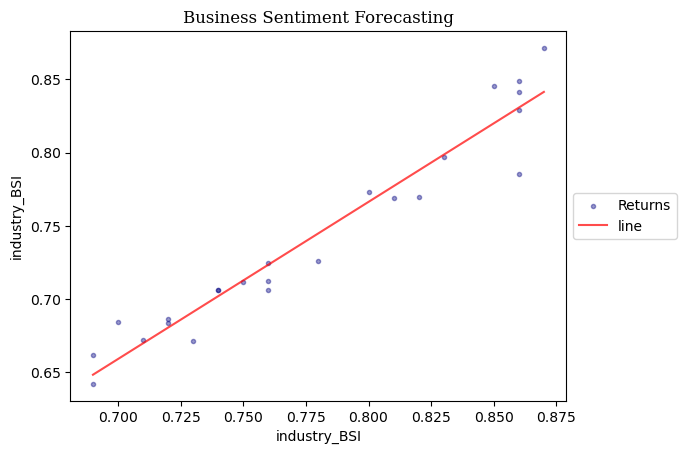

In [58]:
beta, alpha = np.polyfit(x = y_test , y = y_pred ,deg = 1)
plt.scatter(y = y_pred, x = y_test, label = 'Returns', marker = '.', color = 'navy', alpha = 0.4)
sns.lineplot(x = y_test, y = alpha + y_test * beta, color = 'red', label = 'line', alpha = 0.7)
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.title('Business Sentiment Forecasting', fontfamily = 'Serif')
plt.grid(False)
plt.show()

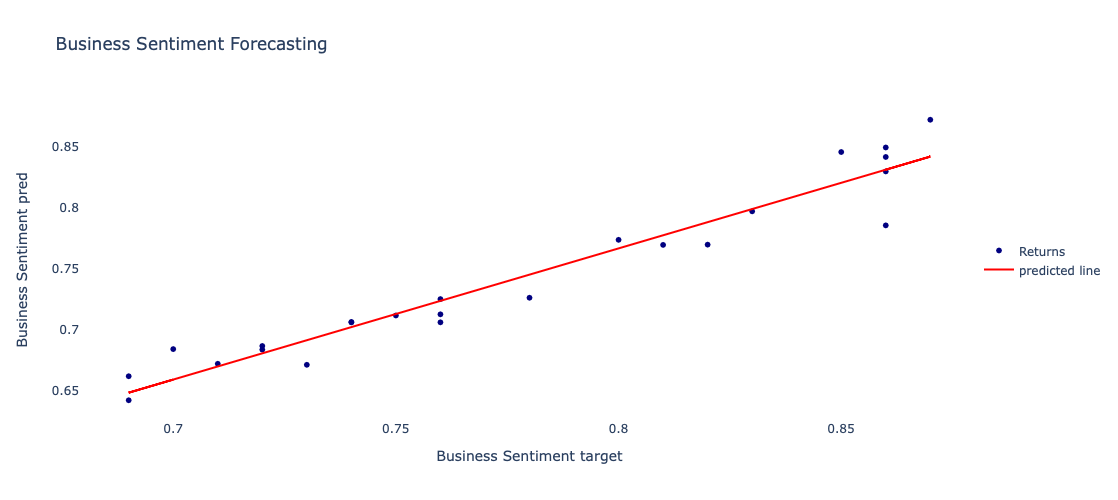

In [59]:
beta, alpha = np.polyfit(x = y_test, y = y_pred, deg = 1)
scatter = go.Scatter(x=y_test, y=y_pred, mode='markers', name='Returns',
                     marker=dict(color='navy'))
line = go.Scatter(x=y_test, y=alpha + beta * y_test, mode='lines', name='predicted line',
                  line=dict(color='red'))
fig = go.Figure(data=[scatter, line])
fig.update_layout(title='Business Sentiment Forecasting',
                  xaxis=dict(title='Business Sentiment target', zerolinecolor='grey', zerolinewidth=2),
                  yaxis=dict(title='Business Sentiment pred', zerolinecolor='grey', zerolinewidth=2),
                  legend=dict(x=1, y=0.5),
                  paper_bgcolor='white', plot_bgcolor='white')
fig.update_layout(width = 700, height = 500)
fig.show()

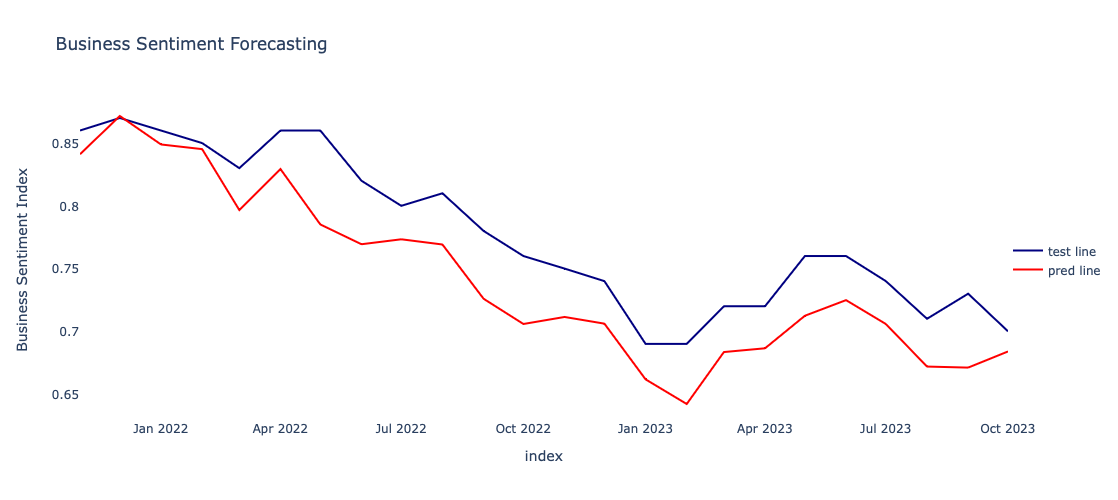

In [60]:
test_line = go.Scatter(x=y_test.index, 
                       y=y_test, 
                       mode='lines', 
                       name='test line', 
                       line=dict(color='navy'))
pred_line = go.Scatter(x=pd.Series(y_pred, index = y_test.index).index, 
                       y=pd.Series(y_pred, index = y_test.index), 
                       mode='lines', 
                       name='pred line', 
                       line=dict(color='red'))
fig = go.Figure(data=[test_line, pred_line])
fig.update_layout(title='Business Sentiment Forecasting',
                  xaxis=dict(title='index', zerolinecolor='grey', zerolinewidth=2),
                  yaxis=dict(title='Business Sentiment Index', zerolinecolor='grey', zerolinewidth=2),
                  legend=dict(x=1, y=0.5),
                  paper_bgcolor='white', plot_bgcolor='white')
fig.update_layout(width = 900, height = 500)
fig.show()

In [61]:
BSI_explain = shap.TreeExplainer(bsi_model)

shap_values_train = BSI_explain(X_train)
shap_values_test = BSI_explain(X_test)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


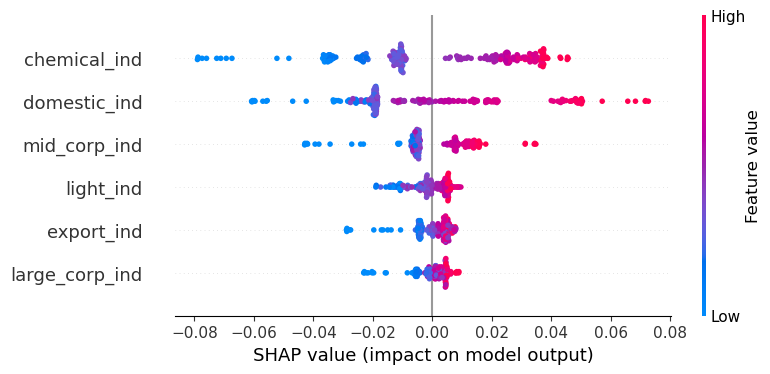

In [62]:
plt.grid(False)
shap.plots.beeswarm(shap_values_train, max_display = len(shap_values_train.feature_names))

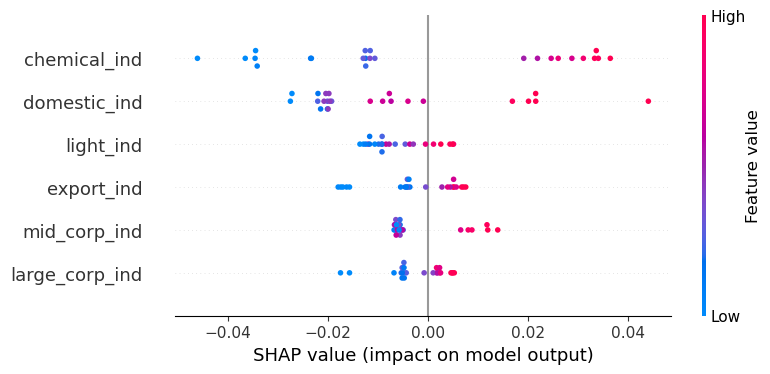

In [63]:
plt.grid(False)
shap.plots.beeswarm(shap_values_test, max_display = len(shap_values_train.feature_names))

In [64]:
train_matrix = pd.concat([
    train_matrix,
    pd.Series(pred_train, index = X_train.index, name = 'business_expectation')
], axis = 1
)
test_matrix = pd.concat([
    test_matrix, 
    pd.Series(y_pred, index = X_test.index, name = 'business_expectation')
], axis = 1)

current balance

In [65]:
X = feature_matrix['current_balance'].drop(['current_balance'], axis = 1)
y = feature_matrix['current_balance']['current_balance']

X_train, X_test, y_train, y_test = X.loc[:'2021-10'], X.loc['2021-11':], y.loc[:'2021-10'], y.loc['2021-11':]

cb_model = RandomForestRegressor(n_estimators = 1000, 
                                          random_state = 42,
                                          criterion = 'squared_error',
                                          max_depth = 4)
cb_model.fit(X_train, y_train)
y_pred = cb_model.predict(X_test)
pred_train = cb_model.predict(X_train)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")

Mean Squared Error: 4.080664322281426


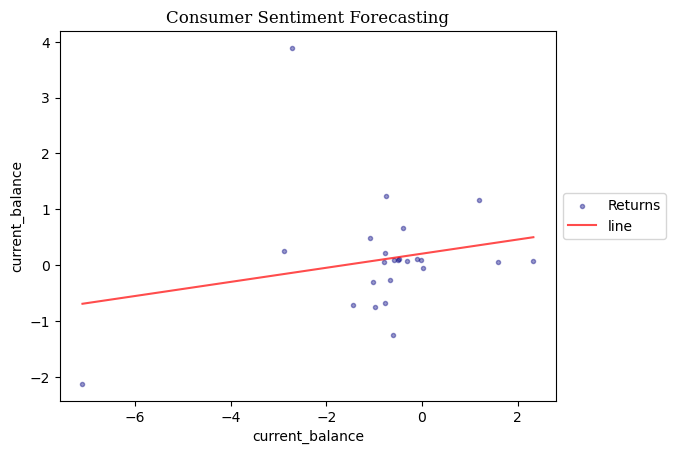

In [66]:
beta, alpha = np.polyfit(x = y_test , y = y_pred ,deg = 1)
plt.scatter(y = y_pred, x = y_test, label = 'Returns', marker = '.', color = 'navy', alpha = 0.4)
sns.lineplot(x = y_test, y = alpha + y_test * beta, color = 'red', label = 'line', alpha = 0.7)
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.title('Consumer Sentiment Forecasting', fontfamily = 'Serif')
plt.grid(False)
plt.show()

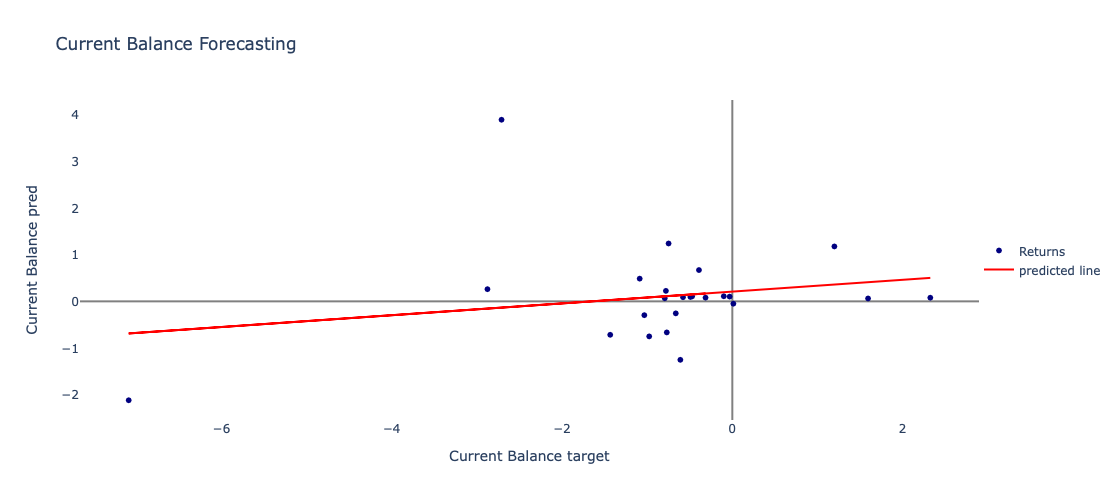

In [67]:
beta, alpha = np.polyfit(x = y_test, y = y_pred, deg = 1)
scatter = go.Scatter(x=y_test, y=y_pred, mode='markers', name='Returns',
                     marker=dict(color='navy'))
line = go.Scatter(x=y_test, y=alpha + beta * y_test, mode='lines', name='predicted line',
                  line=dict(color='red'))
fig = go.Figure(data=[scatter, line])
fig.update_layout(title='Current Balance Forecasting',
                  xaxis=dict(title='Current Balance target', zerolinecolor='grey', zerolinewidth=2),
                  yaxis=dict(title='Current Balance pred', zerolinecolor='grey', zerolinewidth=2),
                  legend=dict(x=1, y=0.5),
                  paper_bgcolor='white', plot_bgcolor='white')
fig.update_layout(width = 700, height = 500)
fig.show()

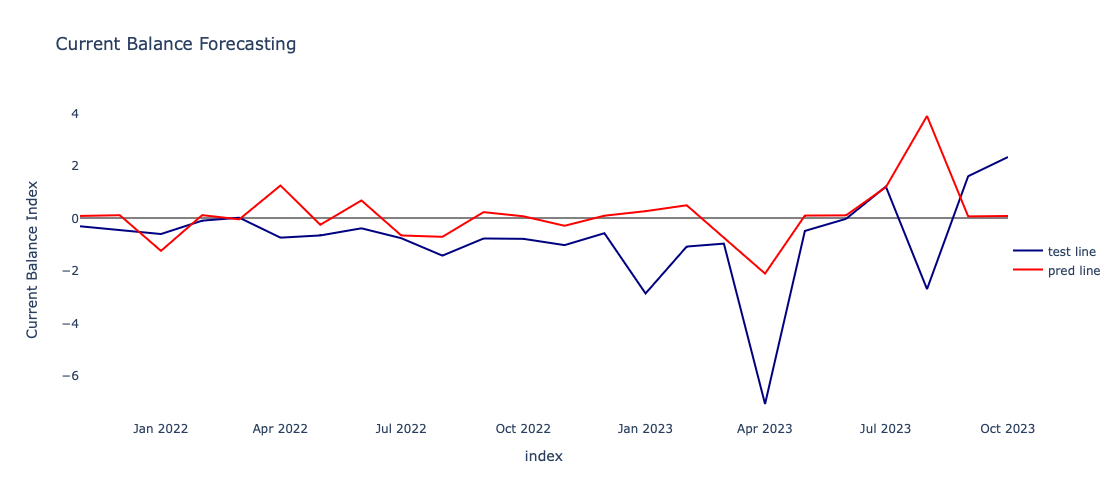

In [68]:
test_line = go.Scatter(x=y_test.index, 
                       y=y_test, 
                       mode='lines', 
                       name='test line', 
                       line=dict(color='navy'))
pred_line = go.Scatter(x=pd.Series(y_pred, index = y_test.index).index, 
                       y=pd.Series(y_pred, index = y_test.index), 
                       mode='lines', 
                       name='pred line', 
                       line=dict(color='red'))
fig = go.Figure(data=[test_line, pred_line])
fig.update_layout(title='Current Balance Forecasting',
                  xaxis=dict(title='index', zerolinecolor='grey', zerolinewidth=2),
                  yaxis=dict(title='Current Balance Index', zerolinecolor='grey', zerolinewidth=2),
                  legend=dict(x=1, y=0.5),
                  paper_bgcolor='white', plot_bgcolor='white')
fig.update_layout(width = 900, height = 500)
fig.show()

In [69]:
cb_explain = shap.TreeExplainer(cb_model)

shap_values_train = cb_explain(X_train)
shap_values_test = cb_explain(X_test)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


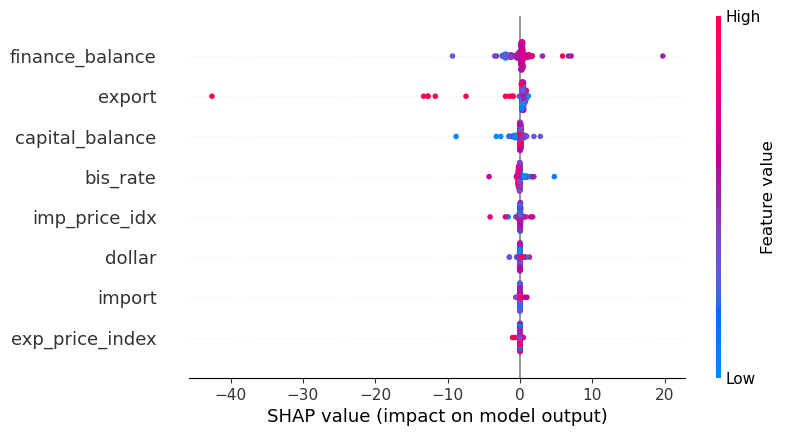

In [70]:
plt.grid(False)
shap.plots.beeswarm(shap_values_train, max_display = len(shap_values_train.feature_names))

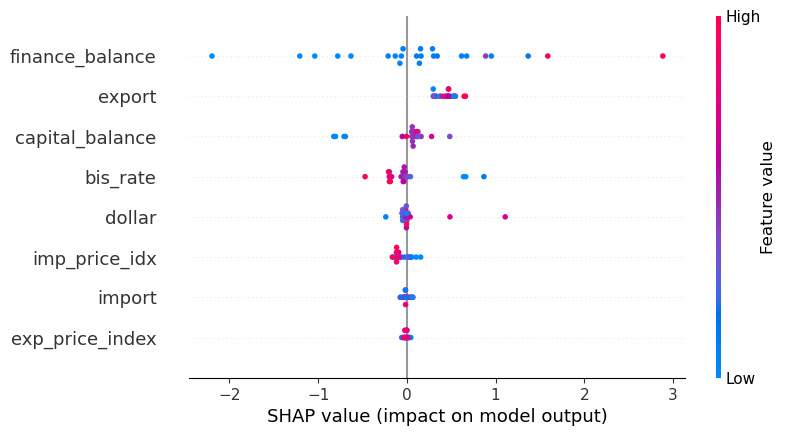

In [71]:
plt.grid(False)
shap.plots.beeswarm(shap_values_test, max_display = len(shap_values_train.feature_names))

In [72]:
train_matrix = pd.concat([
    train_matrix,
    pd.Series(pred_train, index = X_train.index, name = 'current_balance')
], axis = 1
)
test_matrix = pd.concat([
    test_matrix, 
    pd.Series(y_pred, index = X_test.index, name = 'current_balance')
], axis = 1)

monetary

In [73]:
X = feature_matrix['monetary_market'].drop(['m1_rate','m2_rate','lf_rate','liquidity','deposit','money_mort_loan','comp_loan','nonbank_loan_rate'], axis = 1)
y = feature_matrix['monetary_market']['lf_rate']

X_train, X_test, y_train, y_test = X.loc[:'2021-10'], X.loc['2021-11':], y.loc[:'2021-10'], y.loc['2021-11':]

mm_model = RandomForestRegressor(n_estimators = 1000, 
                                          random_state = 42,
                                          criterion = 'squared_error',
                                          max_depth = 6)
mm_model.fit(X_train, y_train)
y_pred = mm_model.predict(X_test)
pred_train = mm_model.predict(X_train)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.00034962177840612953


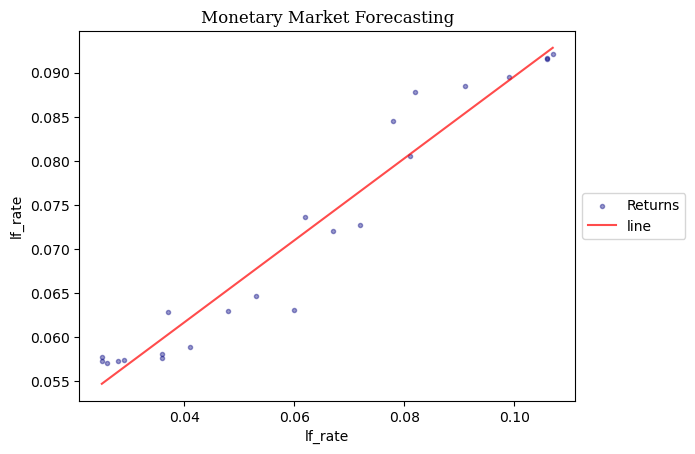

In [74]:
beta, alpha = np.polyfit(x = y_test , y = y_pred ,deg = 1)
plt.scatter(y = y_pred, x = y_test, label = 'Returns', marker = '.', color = 'navy', alpha = 0.4)
sns.lineplot(x = y_test, y = alpha + y_test * beta, color = 'red', label = 'line', alpha = 0.7)
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.title('Monetary Market Forecasting', fontfamily = 'Serif')
plt.grid(False)
plt.show()

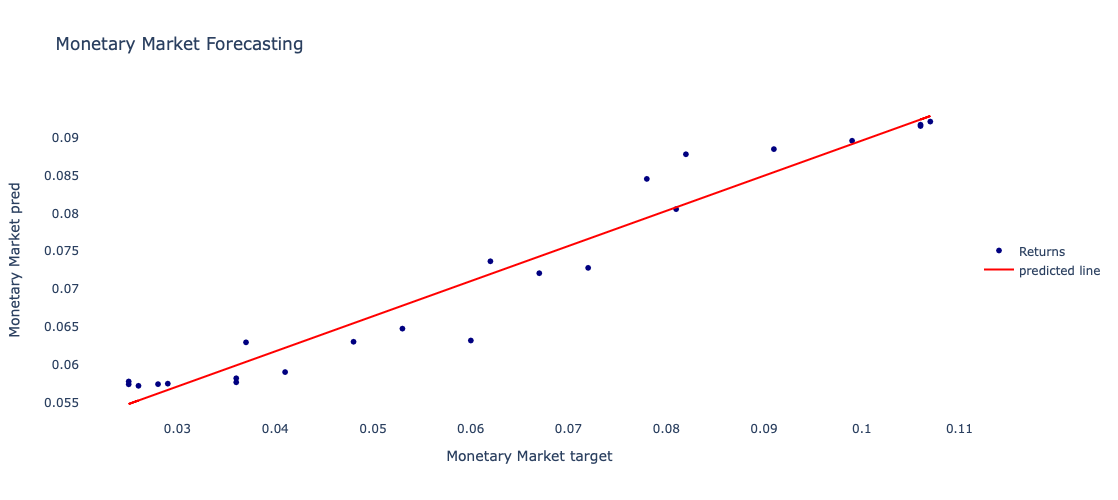

In [75]:
beta, alpha = np.polyfit(x = y_test, y = y_pred, deg = 1)
scatter = go.Scatter(x=y_test, y=y_pred, mode='markers', name='Returns',
                     marker=dict(color='navy'))
line = go.Scatter(x=y_test, y=alpha + beta * y_test, mode='lines', name='predicted line',
                  line=dict(color='red'))
fig = go.Figure(data=[scatter, line])
fig.update_layout(title='Monetary Market Forecasting',
                  xaxis=dict(title='Monetary Market target', zerolinecolor='grey', zerolinewidth=2),
                  yaxis=dict(title='Monetary Market pred', zerolinecolor='grey', zerolinewidth=2),
                  legend=dict(x=1, y=0.5),
                  paper_bgcolor='white', plot_bgcolor='white')
fig.update_layout(width = 700, height = 500)
fig.show()

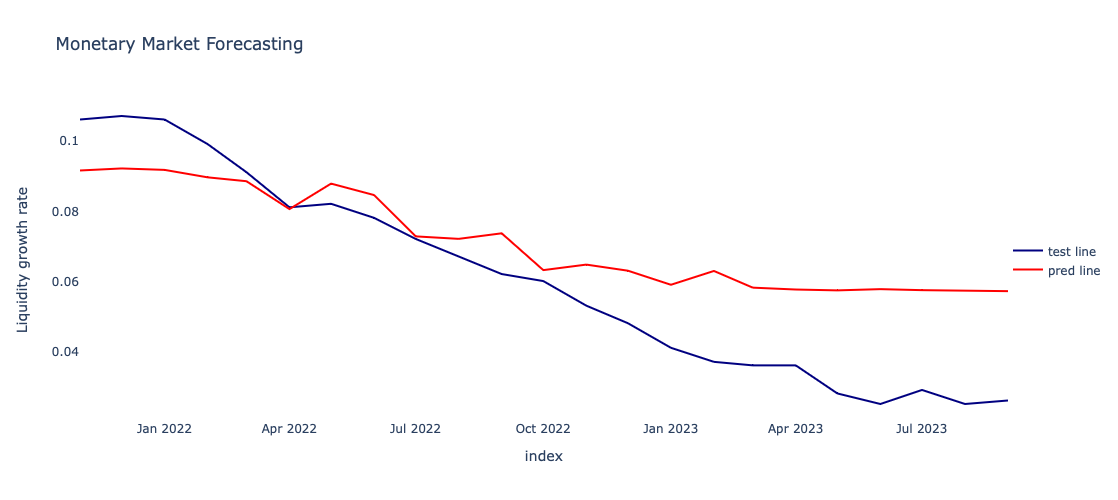

In [76]:
test_line = go.Scatter(x=y_test.index, 
                       y=y_test, 
                       mode='lines', 
                       name='test line', 
                       line=dict(color='navy'))
pred_line = go.Scatter(x=pd.Series(y_pred, index = y_test.index).index, 
                       y=pd.Series(y_pred, index = y_test.index), 
                       mode='lines', 
                       name='pred line', 
                       line=dict(color='red'))
fig = go.Figure(data=[test_line, pred_line])
fig.update_layout(title='Monetary Market Forecasting',
                  xaxis=dict(title='index', zerolinecolor='grey', zerolinewidth=2),
                  yaxis=dict(title='Liquidity growth rate', zerolinecolor='grey', zerolinewidth=2),
                  legend=dict(x=1, y=0.5),
                  paper_bgcolor='white', plot_bgcolor='white')
fig.update_layout(width = 900, height = 500)
fig.show()

In [77]:
mm_explain = shap.TreeExplainer(mm_model)

shap_values_train = mm_explain(X_train)
shap_values_test = mm_explain(X_test)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


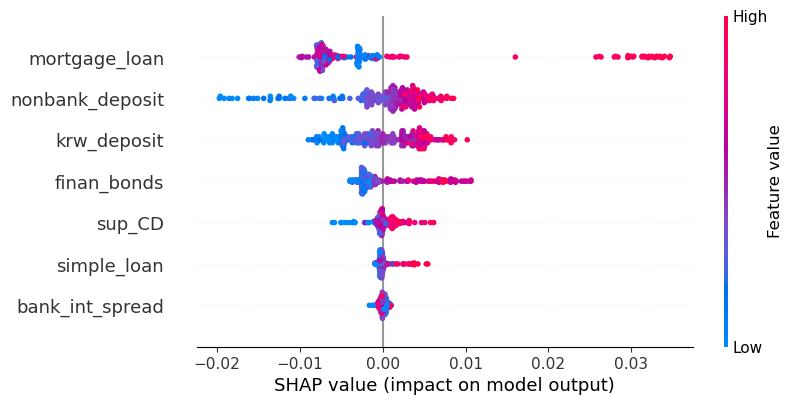

In [78]:
plt.grid(False)
shap.plots.beeswarm(shap_values_train, max_display = len(shap_values_train.feature_names))

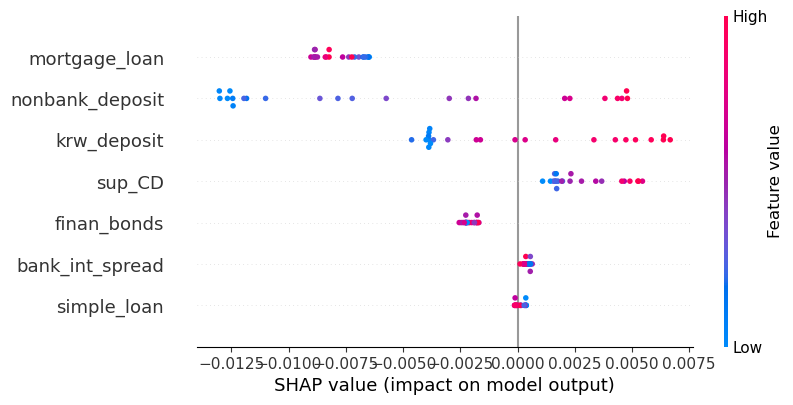

In [79]:
plt.grid(False)
shap.plots.beeswarm(shap_values_test, max_display = len(shap_values_train.feature_names))

In [80]:
train_matrix = pd.concat([
    train_matrix,
    pd.Series(pred_train, index = X_train.index, name = 'monetary_market')
], axis = 1
)
test_matrix = pd.concat([
    test_matrix, 
    pd.Series(y_pred, index = X_test.index, name = 'monetary_market')
], axis = 1)

credit risk

In [81]:
X = feature_matrix['credit_risk'].drop(['credit_int_rate','deposit_int_rate','credit_deposit_spread','overnight_rate','CDS_premium_AA'], axis = 1)
y = feature_matrix['credit_risk']['CDS_premium_AA']

X_train, X_test, y_train, y_test = X.loc[:'2021-10'], X.loc['2021-11':], y.loc[:'2021-10'], y.loc['2021-11':]

credit_model = RandomForestRegressor(n_estimators = 1000, 
                                          random_state = 42,
                                          criterion = 'squared_error',
                                          max_depth = 8)
credit_model.fit(X_train, y_train)
y_pred = credit_model.predict(X_test)
pred_train = credit_model.predict(X_train)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")

Mean Squared Error: 1.1395819773839486e-05


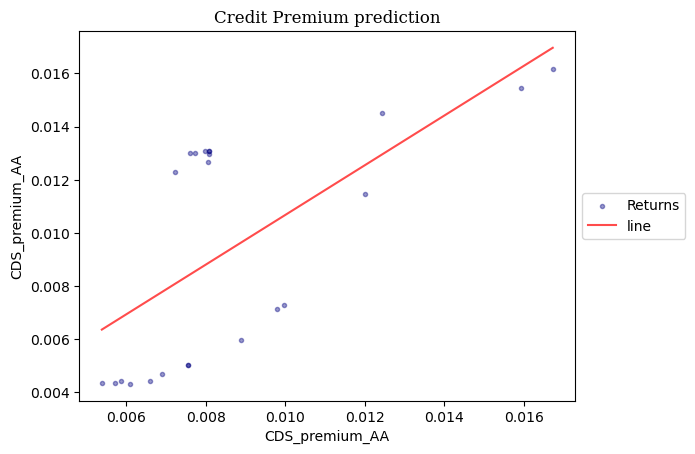

In [82]:
beta, alpha = np.polyfit(x = y_test , y = y_pred ,deg = 1)
#plt.axvline(0, color = 'grey', alpha = 0.5)
#plt.axhline(0, color = 'grey', alpha = 0.5)
plt.scatter(y = y_pred, x = y_test, label = 'Returns', marker = '.', color = 'navy', alpha = 0.4)
sns.lineplot(x = y_test, y = alpha + y_test * beta, color = 'red', label = 'line', alpha = 0.7)
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.title('Credit Premium prediction', fontfamily = 'Serif')
plt.grid(False)
plt.show()

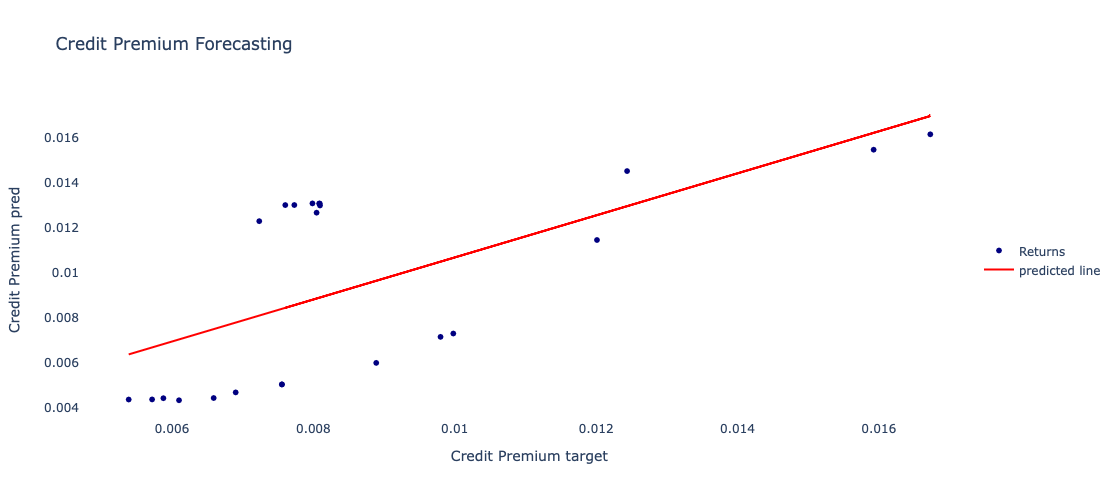

In [83]:
beta, alpha = np.polyfit(x = y_test, y = y_pred, deg = 1)
scatter = go.Scatter(x=y_test, y=y_pred, mode='markers', name='Returns',
                     marker=dict(color='navy'))
line = go.Scatter(x=y_test, y=alpha + beta * y_test, mode='lines', name='predicted line',
                  line=dict(color='red'))
fig = go.Figure(data=[scatter, line])
fig.update_layout(title='Credit Premium Forecasting',
                  xaxis=dict(title='Credit Premium target', zerolinecolor='grey', zerolinewidth=2),
                  yaxis=dict(title='Credit Premium pred', zerolinecolor='grey', zerolinewidth=2),
                  legend=dict(x=1, y=0.5),
                  paper_bgcolor='white', plot_bgcolor='white')
fig.update_layout(width = 700, height = 500)
fig.show()

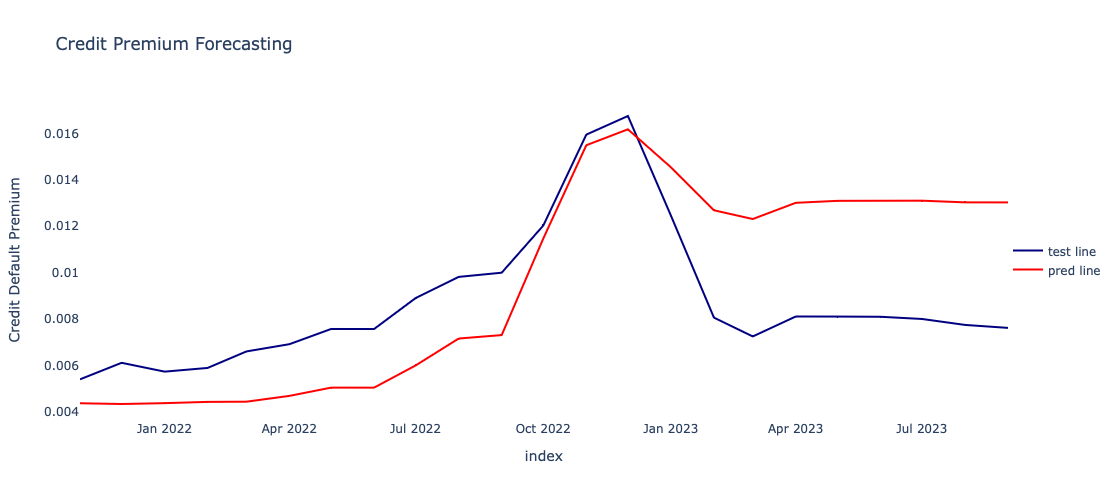

In [84]:
test_line = go.Scatter(x=y_test.index, 
                       y=y_test, 
                       mode='lines', 
                       name='test line', 
                       line=dict(color='navy'))
pred_line = go.Scatter(x=pd.Series(y_pred, index = y_test.index).index, 
                       y=pd.Series(y_pred, index = y_test.index), 
                       mode='lines', 
                       name='pred line', 
                       line=dict(color='red'))
fig = go.Figure(data=[test_line, pred_line])
fig.update_layout(title='Credit Premium Forecasting',
                  xaxis=dict(title='index', zerolinecolor='grey', zerolinewidth=2),
                  yaxis=dict(title='Credit Default Premium', zerolinecolor='grey', zerolinewidth=2),
                  legend=dict(x=1, y=0.5),
                  paper_bgcolor='white', plot_bgcolor='white')
fig.update_layout(width = 900, height = 500)
fig.show()

In [85]:
credit_explain = shap.TreeExplainer(credit_model)

shap_values_train = credit_explain(X_train)
shap_values_test = credit_explain(X_test)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


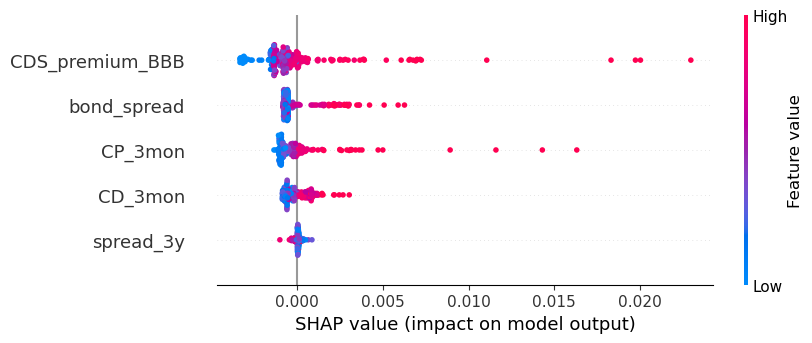

In [86]:
plt.grid(False)
shap.plots.beeswarm(shap_values_train, max_display = len(shap_values_train.feature_names))

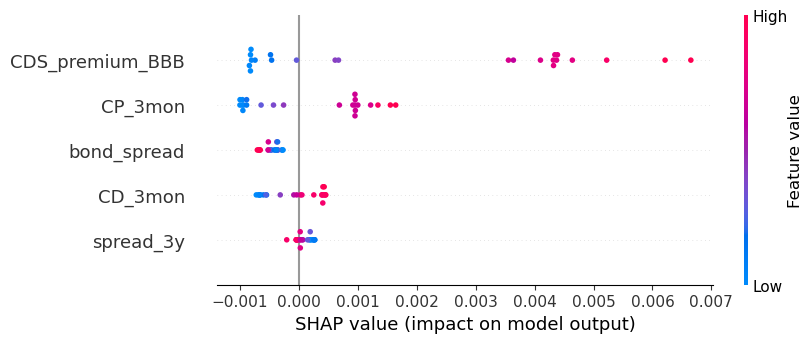

In [87]:
plt.grid(False)
shap.plots.beeswarm(shap_values_test, max_display = len(shap_values_train.feature_names))

In [88]:
train_matrix = pd.concat([
    train_matrix,
    pd.Series(pred_train, index = X_train.index, name = 'credit_premium')
], axis = 1
)
test_matrix = pd.concat([
    test_matrix, 
    pd.Series(y_pred, index = X_test.index, name = 'credit_premium')
], axis = 1)

#### Secondary Modeling

In [89]:
gdp

gdp_estimated
2001-01-01       0.000000
2001-02-01      -0.157105
2001-03-01       0.033472
2001-04-01       0.037972
2001-05-01       0.034091
...                   ...
2023-05-01       0.001380
2023-06-01       0.004700
2023-07-01      -0.003103
2023-08-01       0.012109
2023-09-01       0.016312

[273 rows x 1 columns]

In [90]:
from statsmodels.tsa.statespace.mlemodel import MLEModel

def kalman_smoothing(close : pd.Series, 
                     q : float, dt : float = 1.0, s : float = 0.5,
                     A : np.array = np.array([[1]]), 
                     Q : np.array = np.array([[1]]), 
                     H : np.array = np.array([[1]]), 
                     R : np.array = np.eye(1),
                     m0 : np.array = np.array([[1]]),
                     P0 : np.array = np.eye(1),
                     k_state : int = 1) -> pd.DataFrame :
    Q = q * Q
    R = s ** 2 * R

    kf = MLEModel(close, k_states = k_state)
    kf._state_names = ['x1']
    kf['design'] = H
    kf['obs_cov'] = R
    kf['transition'] = A
    kf['selection'] = np.eye(1)
    kf['state_cov'] = Q

    kf.initialize_known(A @ m0[:, 0], A @ P0 @ A.T + Q)
    res = kf.smooth(params = [])
    output = pd.DataFrame(res.states.smoothed.x1.values, index = close.index, columns = ['smoothered'])
    
    return output

In [91]:
kalman_smoothed = kalman_smoothing(gdp.cumsum(), q = 0.1)

No frequency information was provided, so inferred frequency MS will be used.


In [92]:
kalman_smoothed.diff()

smoothered
2001-01-01         NaN
2001-02-01   -0.072507
2001-03-01   -0.023673
2001-04-01    0.002302
2001-05-01    0.014009
...                ...
2023-05-01    0.002599
2023-06-01    0.003117
2023-07-01    0.003000
2023-08-01    0.005326
2023-09-01    0.004938

[273 rows x 1 columns]

In [93]:
train_matrix.dropna()

consumption  construction  facility  production     labor  \
2003-01-01     0.002186      0.021678 -0.023276    0.041171  0.037000   
2003-02-01    -0.001773      0.018955  0.043781    0.044073  0.038139   
2003-03-01     0.002221      0.027799  0.020483    0.029834  0.037000   
2003-04-01    -0.003738      0.014049 -0.003337    0.020993  0.034987   
2003-05-01    -0.004590      0.029443 -0.016203    0.001048  0.034000   
...                 ...           ...       ...         ...       ...   
2021-06-01     0.009930     -0.013143  0.025533    0.072881  0.038000   
2021-07-01     0.011424     -0.002174  0.023685    0.052531  0.032000   
2021-08-01     0.012005     -0.000833  0.037583    0.067042  0.026336   
2021-09-01     0.015231     -0.008191 -0.017396    0.026049  0.026802   
2021-10-01     0.018977     -0.005051  0.011381    0.055053  0.027898   

            consumer_expectation  business_expectation  current_balance  \
2003-01-01              1.054710              0.822707         0.775658   
2003-02-01              1.039429              0.739752        -1.470794   
2003-03-01              0.937784              0.731558        -1.490607   
2003-04-01              0.941905              0.767366         0.194959   
2003-05-01              0.912922              0.741819         0.329551   
...                          ...                   ...              ...   
2021-06-01              1.091559              0.880155        -1.888639   
2021-07-01              1.041946              0.874964         0.358121   
2021-08-01              1.030682              0.869092         0.381961   
2021-09-01              1.038529              0.837928         0.111299   
2021-10-01              1.065803              0.834467        -0.230558   

            monetary_market  credit_premium  
2003-01-01         0.128749        0.006148  
2003-02-01         0.122837        0.006312  
2003-03-01         0.116153        0.006598  
2003-04-01         0.107463        0.006941  
2003-05-01         0.091313        0.007703  
...                     ...             ...  
2021-06-01         0.089486        0.007092  
2021-07-01         0.096936        0.005523  
2021-08-01         0.099592        0.005010  
2021-09-01         0.099740        0.004839  
2021-10-01         0.095075        0.004399  

[226 rows x 10 columns]

In [131]:
X_train, X_test = train_matrix.dropna().drop(['production'],axis = 1), test_matrix.dropna().drop(['production'],axis = 1)
y_train, y_test = kalman_smoothed.diff().loc['2003':'2021-10'], kalman_smoothed.diff().loc['2021-11':]

model = RandomForestRegressor(n_estimators = 1000, 
                              random_state = 42,
                              criterion = 'absolute_error',
                              max_depth = 6)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Squared Error: 9.3753549790277e-06


In [132]:
gdp_real = pd.read_excel('../Data/GDP 성장률.xlsx', index_col = 0)
gdp_real.index = pd.date_range(start = '2000-01-01', end = '2023-11-01', freq = 'Q').strftime('%Y-%m')

In [133]:
gdp_real.index = pd.to_datetime(gdp_real.index)

In [134]:
gdp_real

전기대비(좌축)  gdp_rate
2000-03-01       1.9      12.7
2000-06-01       1.3       9.1
2000-09-01       2.8       9.1
2000-12-01      -0.3       5.9
2001-03-01       1.2       5.1
...              ...       ...
2022-09-01       0.2       3.2
2022-12-01      -0.3       1.4
2023-03-01       0.3       0.9
2023-06-01       0.6       0.9
2023-09-01       0.6       1.4

[95 rows x 2 columns]

Text(0.5, 1.0, 'GDP Forecasting')

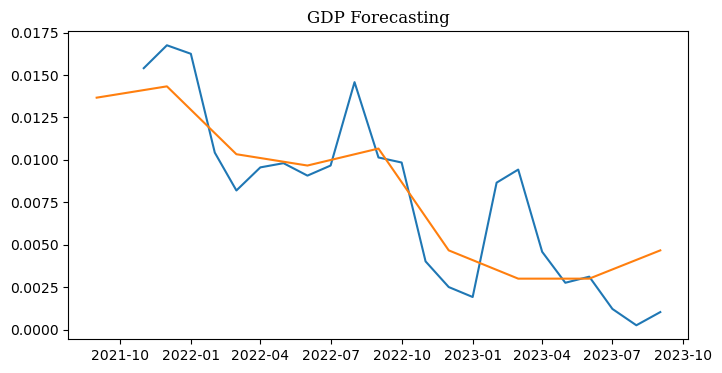

In [135]:
plt.figure(figsize = (8, 4))
plt.plot(pd.Series(y_pred, index = X_test.index))
plt.plot(gdp_real["gdp_rate"][-9:] / 300)
plt.grid(False)
plt.xlim()
plt.title('GDP Forecasting', fontfamily = 'Serif')

In [136]:
y_test

smoothered
2021-11-01    0.014706
2021-12-01    0.013547
2022-01-01    0.010346
2022-02-01    0.009406
2022-03-01    0.008701
2022-04-01    0.009547
2022-05-01    0.011619
2022-06-01    0.010272
2022-07-01    0.009531
2022-08-01    0.008495
2022-09-01    0.006995
2022-10-01    0.005011
2022-11-01    0.003922
2022-12-01    0.002699
2023-01-01    0.002914
2023-02-01    0.004573
2023-03-01    0.004170
2023-04-01    0.002570
2023-05-01    0.002599
2023-06-01    0.003117
2023-07-01    0.003000
2023-08-01    0.005326
2023-09-01    0.004938

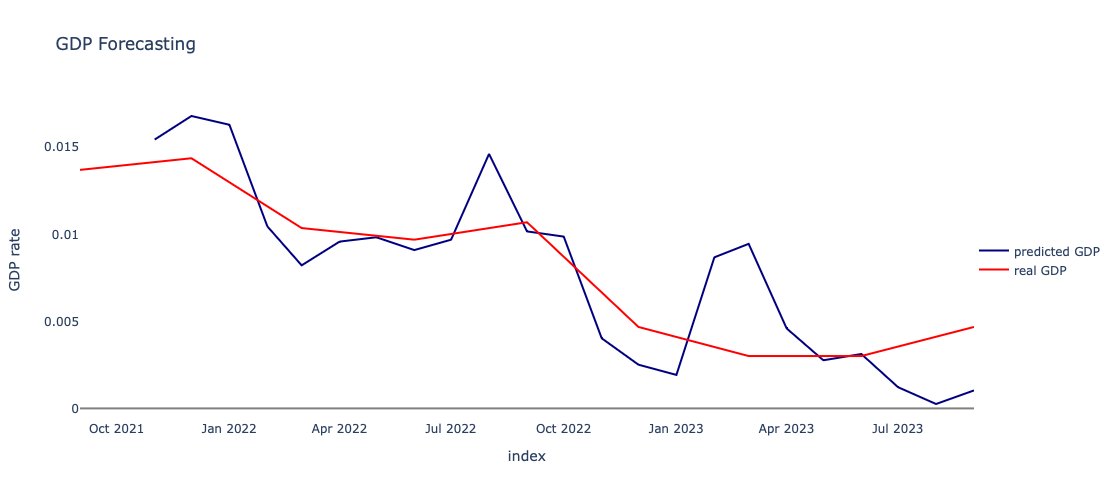

In [137]:
test_line = go.Scatter(x=pd.Series(y_pred, 
                                   index = y_test.index).index, 
                       y=pd.Series(y_pred, 
                                   index = y_test.index), 
                       mode='lines', 
                       name='predicted GDP', 
                       line=dict(color='navy'))
pred_line = go.Scatter(x=gdp_real[-9:].index, 
                       y=(gdp_real["gdp_rate"][-9:] / 300), 
                       mode='lines', 
                       name='real GDP', 
                       line=dict(color='red'))
fig = go.Figure(data=[test_line, pred_line])
fig.update_layout(title='GDP Forecasting',
                  xaxis=dict(title='index', zerolinecolor='grey', zerolinewidth=2),
                  yaxis=dict(title='GDP rate', zerolinecolor='grey', zerolinewidth=2),
                  legend=dict(x=1, y=0.5),
                  paper_bgcolor='white', plot_bgcolor='white')
fig.update_layout(width = 900, height = 500)
fig.show()

Text(0.5, 1.0, 'GDP Forecasting')

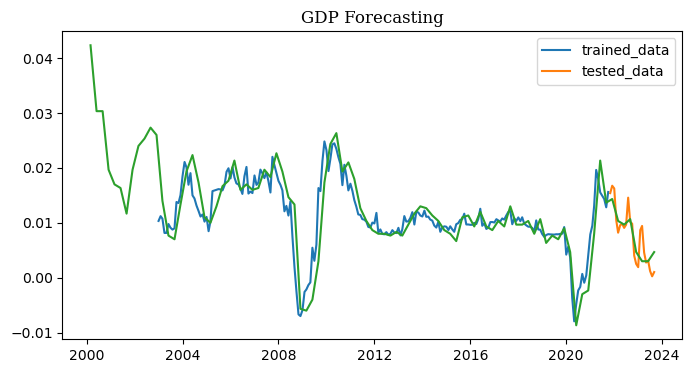

In [139]:
plt.figure(figsize = (8, 4))
plt.plot(pd.Series(model.predict(X_train), index = X_train.index), label = 'trained_data')
plt.plot(pd.Series(y_pred, index = X_test.index), label = 'tested_data')
plt.plot(gdp_real["gdp_rate"] / 300)
plt.legend()
plt.grid(False)
plt.xlim()
plt.title('GDP Forecasting', fontfamily = 'Serif')

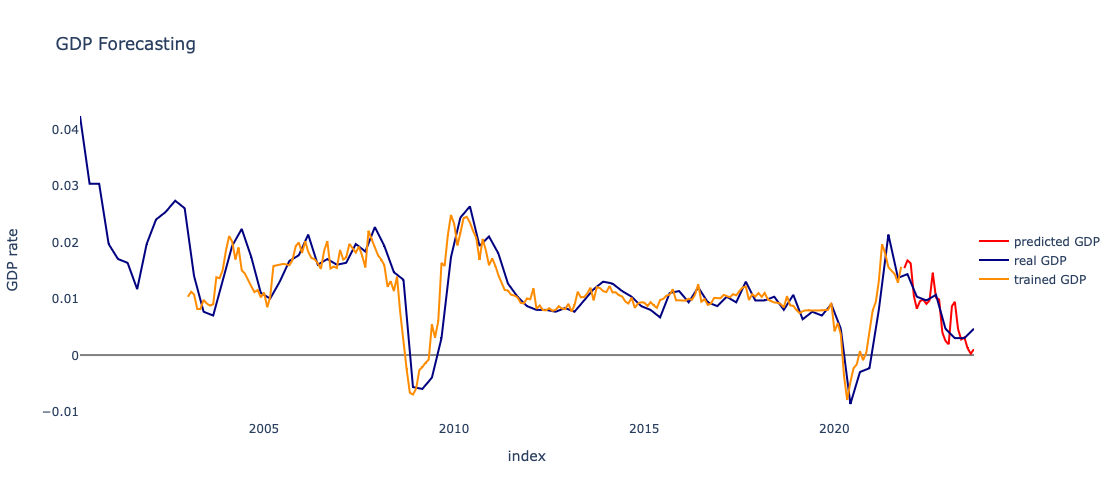

In [140]:
test_line = go.Scatter(x=pd.Series(y_pred, 
                                   index = y_test.index).index, 
                       y=pd.Series(y_pred, 
                                   index = y_test.index), 
                       mode='lines', 
                       name='predicted GDP', 
                       line=dict(color='red'))
pred_line = go.Scatter(x=gdp_real.index, 
                       y=(gdp_real["gdp_rate"] / 300), 
                       mode='lines', 
                       name='real GDP', 
                       line=dict(color='navy'))
train_line = go.Scatter(x=pd.Series(model.predict(X_train), 
                                   index = y_train.index).index, 
                       y=pd.Series(model.predict(X_train), 
                                   index = y_train.index), 
                        mode='lines', 
                        name='trained GDP', 
                        line=dict(color='darkorange'))
fig = go.Figure(data=[test_line, pred_line, train_line])
fig.update_layout(title='GDP Forecasting',
                  xaxis=dict(title='index', zerolinecolor='grey', zerolinewidth=2),
                  yaxis=dict(title='GDP rate', zerolinecolor='grey', zerolinewidth=2),
                  legend=dict(x=1, y=0.5),
                  paper_bgcolor='white', plot_bgcolor='white')
fig.update_layout(width = 900, height = 500)
fig.show()

In [141]:
import shap

explainer_randomforest_reg = shap.TreeExplainer(model)

shap_values_train = explainer_randomforest_reg(X_train)
shap_values_test = explainer_randomforest_reg(X_test)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


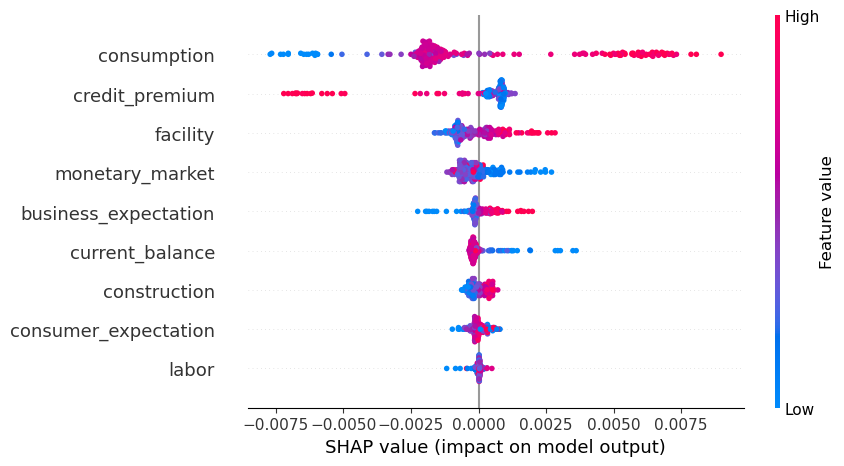

In [142]:
plt.grid(False)
shap.plots.beeswarm(shap_values_train, max_display = len(shap_values_train.feature_names))

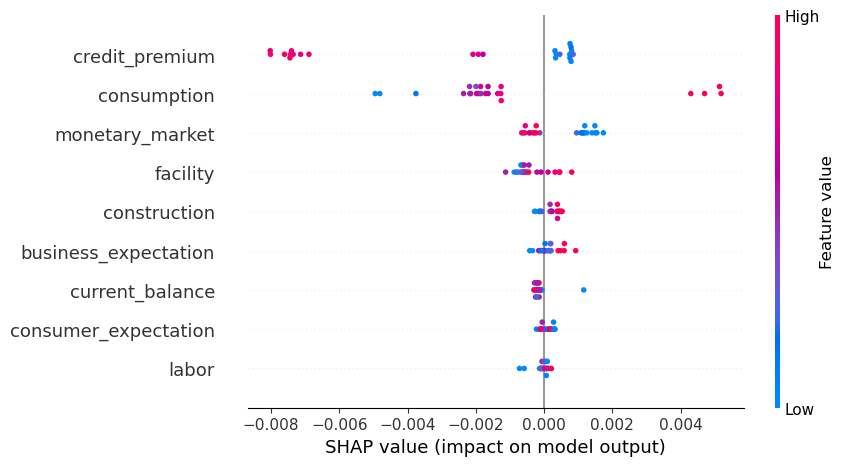

In [143]:
plt.grid(False)
shap.plots.beeswarm(shap_values_test, max_display = len(shap_values_train.feature_names))

In [106]:
#train_matrix.to_csv('../Cleaned_Data/train_matrix.csv')

In [107]:
#test_matrix.to_csv('../Cleaned_Data/test_matrix.csv')

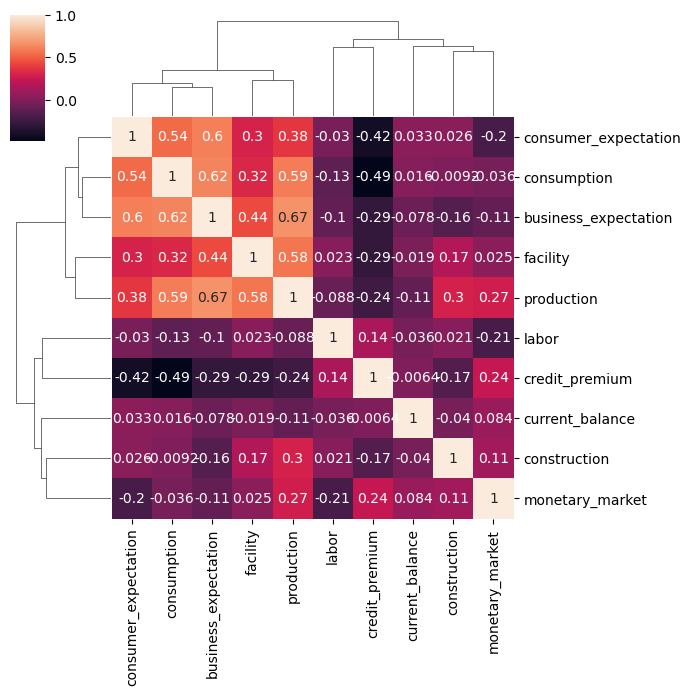

In [108]:
sns.clustermap(train_matrix.corr(), figsize = (7,7), annot = True)

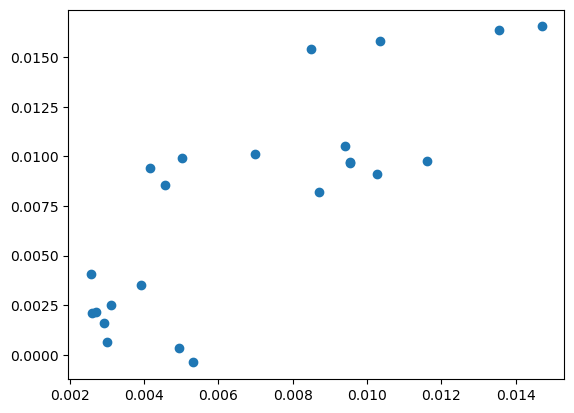

In [112]:
plt.scatter(
    y_test,
    pd.Series(y_pred, index = y_test.index),
    marker = '.',
    
)

In [122]:
y_test.values.reshape(1,-1)[0]

array([0.01470588, 0.0135472 , 0.0103465 , 0.00940637, 0.00870052,
       0.00954708, 0.01161864, 0.01027203, 0.00953085, 0.00849522,
       0.00699462, 0.00501075, 0.00392158, 0.00269949, 0.00291439,
       0.00457314, 0.0041697 , 0.00256991, 0.00259935, 0.00311654,
       0.00300042, 0.00532564, 0.0049377 ])

In [124]:
y_pred

array([ 0.01654608,  0.01638725,  0.01581261,  0.01053428,  0.00819957,
        0.00974284,  0.00977002,  0.00912799,  0.00968303,  0.01539321,
        0.01012734,  0.00989469,  0.00353962,  0.00217473,  0.00162498,
        0.00857521,  0.00943614,  0.00409303,  0.00212198,  0.00250081,
        0.00063859, -0.00038257,  0.00034737])

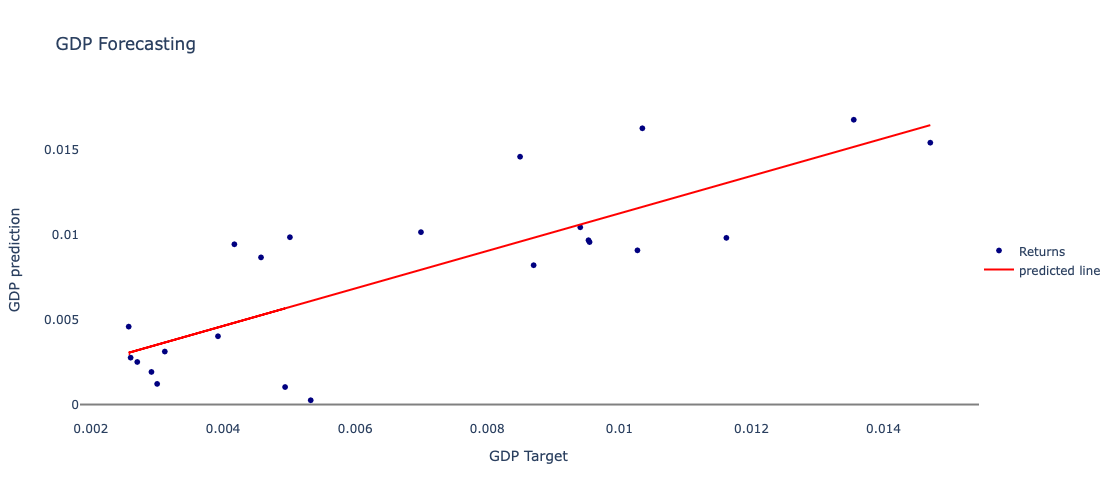

In [144]:
beta, alpha = np.polyfit(x = y_test.values.reshape(1,-1)[0], y = y_pred, deg = 1)
scatter = go.Scatter(x=y_test.values.reshape(1,-1)[0], 
                     y=y_pred, 
                     mode='markers', 
                     name='Returns',
                     marker=dict(color='navy'))
line = go.Scatter(x=y_test.values.reshape(1,-1)[0], 
                  y=alpha + beta * y_test.values.reshape(1,-1)[0], 
                  mode='lines', name='predicted line',
                  line=dict(color='red'))
fig = go.Figure(data=[scatter, line])
fig.update_layout(title='GDP Forecasting',
                  xaxis=dict(title='GDP Target', zerolinecolor='grey', zerolinewidth=2),
                  yaxis=dict(title='GDP prediction', zerolinecolor='grey', zerolinewidth=2),
                  legend=dict(x=1, y=0.5),
                  paper_bgcolor='white', plot_bgcolor='white')
fig.update_layout(width = 700, height = 500)
fig.show()